In [1]:
!pip uninstall -y scikit-learn
!pip uninstall -y imbalanced-learn

!pip install scikit-learn==1.2.2
!pip install imbalanced-learn==0.8.1

Found existing installation: scikit-learn 1.6.0
Uninstalling scikit-learn-1.6.0:
  Successfully uninstalled scikit-learn-1.6.0
Found existing installation: imbalanced-learn 0.12.4
Uninstalling imbalanced-learn-0.12.4:
  Successfully uninstalled imbalanced-learn-0.12.4
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 54.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mlxtend 0.23.3 requires scikit-learn>=1.3.1, but you have scikit-learn 1.2.2 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.7/189.7 kB 3.6 MB/s eta 0:00:00


In [2]:
#Data collection
import pandas as pd

df = pd.read_csv('/content/Hotel_Reviews.csv')

df.head()


,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [3]:
import pandas as pd

df = pd.read_csv('Hotel_Reviews.csv')

df['Reviewer_Score'] = df['Reviewer_Score'].fillna(df['Reviewer_Score'].median())

if df['Reviewer_Score'].isnull().any():
    raise ValueError("There are still NaN values in the Reviewer_Score column after filling.")

#10,000 rows
random_sample = df.sample(n=10000, random_state=42)

#shape
print(f"Random Sample Size: {random_sample.shape}")

random_sample.to_csv('Reduced_Hotel_Reviews_10000.csv', index=False)


Random Sample Size: (10000, 17)


In [4]:
# Data statistics

import pandas as pd

df = pd.read_csv('/content/Hotel_Reviews.csv')

print("First five rows of the dataset:")
print(df.head(5))

sample_df = df.head(5)

print("\nSample data shape (rows, columns):")
print(sample_df.shape)

# Basic statistics summary mean, median, mode, etc
print("\nBasic statistics (mean, median, mode, etc.) for numeric columns from the sample:")
print(sample_df.describe())

numeric_columns_sample = sample_df.select_dtypes(include=['number'])

print("\nMean of numeric columns from the sample:")
print(numeric_columns_sample.mean())

print("\nMedian of numeric columns from the sample:")
print(numeric_columns_sample.median())

print("\nMode of numeric columns from the sample:")
print(numeric_columns_sample.mode().iloc[0])

print("\nData info (non-null count, data types) of the sample:")
print(sample_df.info())



First five rows of the dataset:
                                       Hotel_Address  \
0   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
1   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
2   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
3   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
4   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   

   Additional_Number_of_Scoring Review_Date  Average_Score   Hotel_Name  \
0                           194    8/3/2017            7.7  Hotel Arena   
1                           194    8/3/2017            7.7  Hotel Arena   
2                           194   7/31/2017            7.7  Hotel Arena   
3                           194   7/31/2017            7.7  Hotel Arena   
4                           194   7/24/2017            7.7  Hotel Arena   

  Reviewer_Nationality                                    Negative_Review  \
0              Russia    I am so angry that i made this post available...   
1             Ireland     

In [5]:

# Data preprocessing
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

file_path = 'Reduced_Hotel_Reviews_10000.csv'
df = pd.read_csv(file_path)

nltk.download('stopwords')
nltk.download('punkt_tab')

print("Data Shape:", df.shape)

#Basic information about the dataset
print("\nBefore Data Preprocessing:")
df.info()
print("\nMissing Values Before Cleaning:\n", df.isnull().sum())

numerical_cols = df.select_dtypes(include=[np.number]).columns
df[numerical_cols] = df[numerical_cols].apply(lambda col: col.fillna(col.median()))

categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].apply(lambda col: col.fillna(method='ffill'))

if 'Review_Date' in df.columns:
    df['Review_Date'] = pd.to_datetime(df['Review_Date'], errors='coerce')

def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text.lower())
    filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    return ' '.join(filtered_tokens)

if 'Positive_Review' in df.columns:
    df['Positive_Review_Tokenized'] = df['Positive_Review'].apply(preprocess_text)

if 'Negative_Review' in df.columns:
    df['Negative_Review_Tokenized'] = df['Negative_Review'].apply(preprocess_text)

if 'Positive_Review' in df.columns and 'Negative_Review' in df.columns:
    df['Positive_Review_Length'] = df['Positive_Review_Tokenized'].apply(lambda x: len(x.split()))
    df['Negative_Review_Length'] = df['Negative_Review_Tokenized'].apply(lambda x: len(x.split()))
    df['Review_Length'] = df['Positive_Review_Length'] + df['Negative_Review_Length']

count_vectorizer = CountVectorizer(max_features=5000)
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

if 'Positive_Review_Tokenized' in df.columns:
    X_positive_count = count_vectorizer.fit_transform(df['Positive_Review_Tokenized'])
    X_negative_count = count_vectorizer.transform(df['Negative_Review_Tokenized'])

if 'Positive_Review_Tokenized' in df.columns:
    X_positive_tfidf = tfidf_vectorizer.fit_transform(df['Positive_Review_Tokenized'])
    X_negative_tfidf = tfidf_vectorizer.transform(df['Negative_Review_Tokenized'])

print("\nSummary of Numerical Columns After Cleaning:\n", df.describe())
print("\nSummary of Categorical Columns After Cleaning:")
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"\nColumn: {col}\n", df[col].value_counts().head(10))

print("\nAfter Data Preprocessing:")
df.info()
print("\nMissing Values After Cleaning:\n", df.isnull().sum())

df.to_csv('hotel_reviews.csv', index=False)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
<ipython-input-5-ad70d049926b>:26: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[categorical_cols] = df[categorical_cols].apply(lambda col: col.fillna(method='ffill'))


Data Shape: (10000, 17)

Before Data Preprocessing:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Hotel_Address                               10000 non-null  object 
 1   Additional_Number_of_Scoring                10000 non-null  int64  
 2   Review_Date                                 10000 non-null  object 
 3   Average_Score                               10000 non-null  float64
 4   Hotel_Name                                  10000 non-null  object 
 5   Reviewer_Nationality                        10000 non-null  object 
 6   Negative_Review                             10000 non-null  object 
 7   Review_Total_Negative_Word_Counts           10000 non-null  int64  
 8   Total_Number_of_Reviews                     10000 non-null  int64  
 9   Positive_Review                 

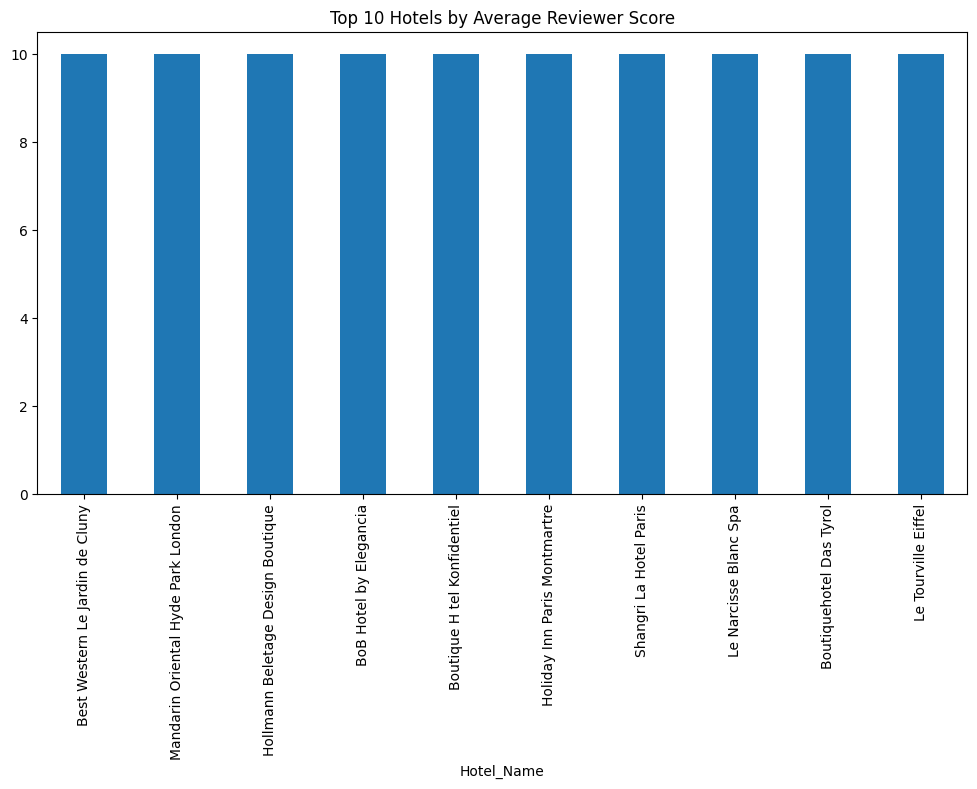

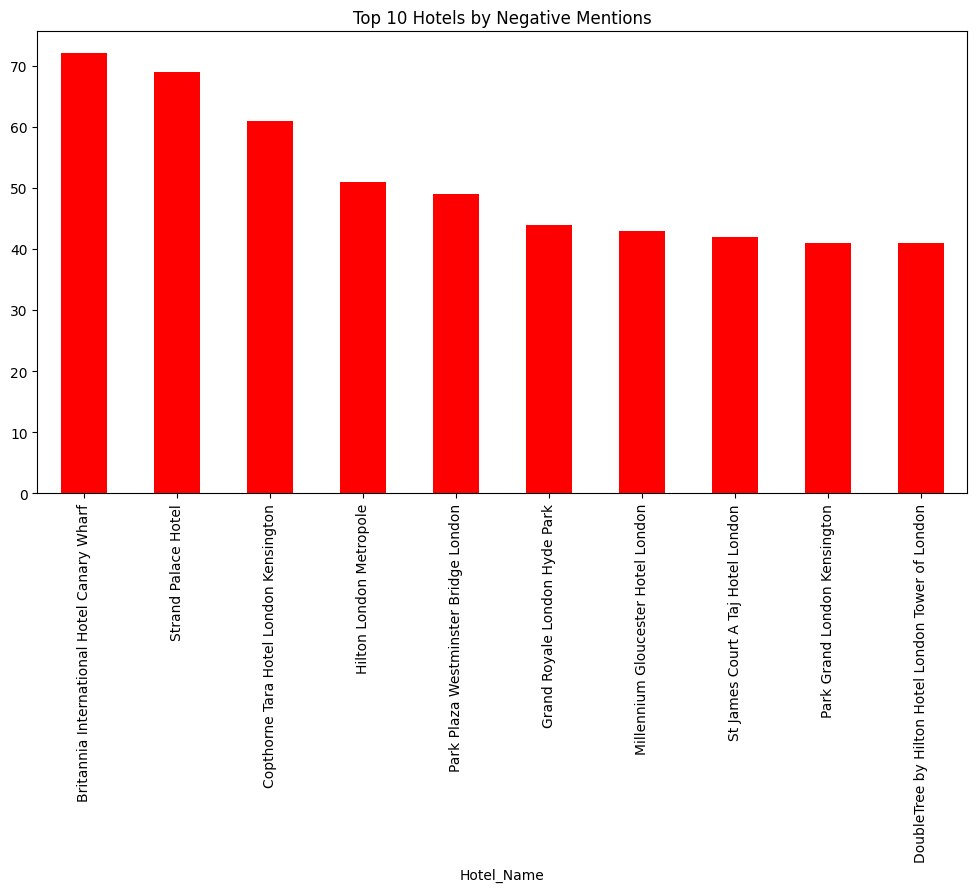

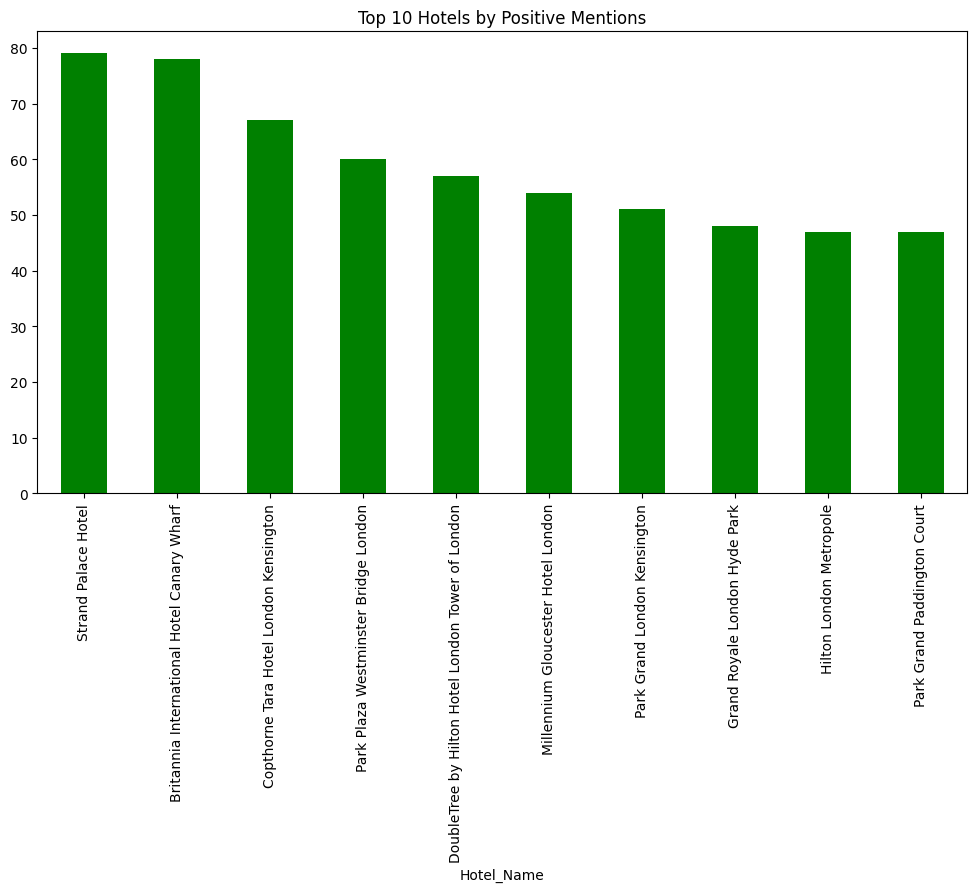

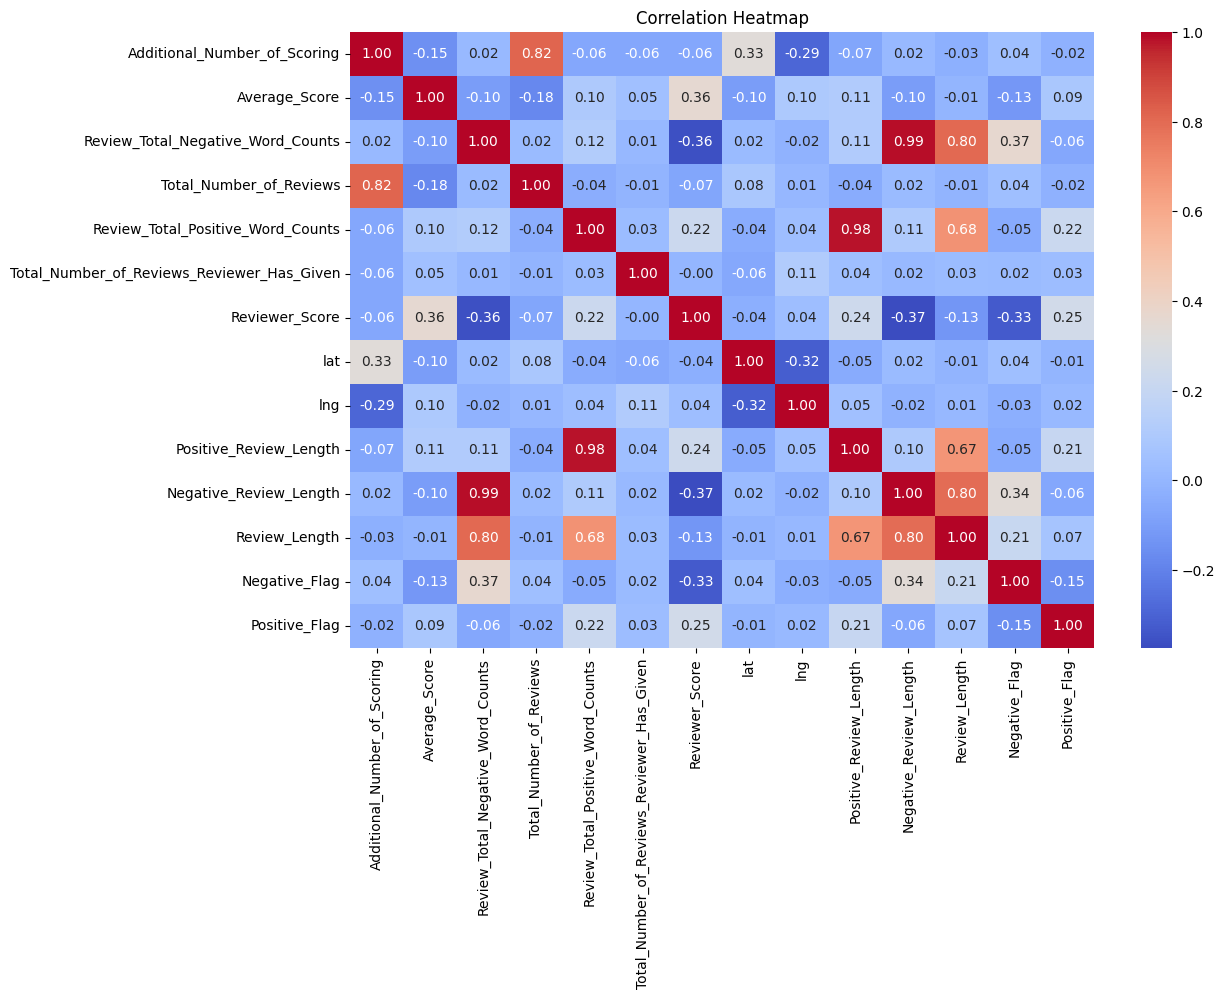

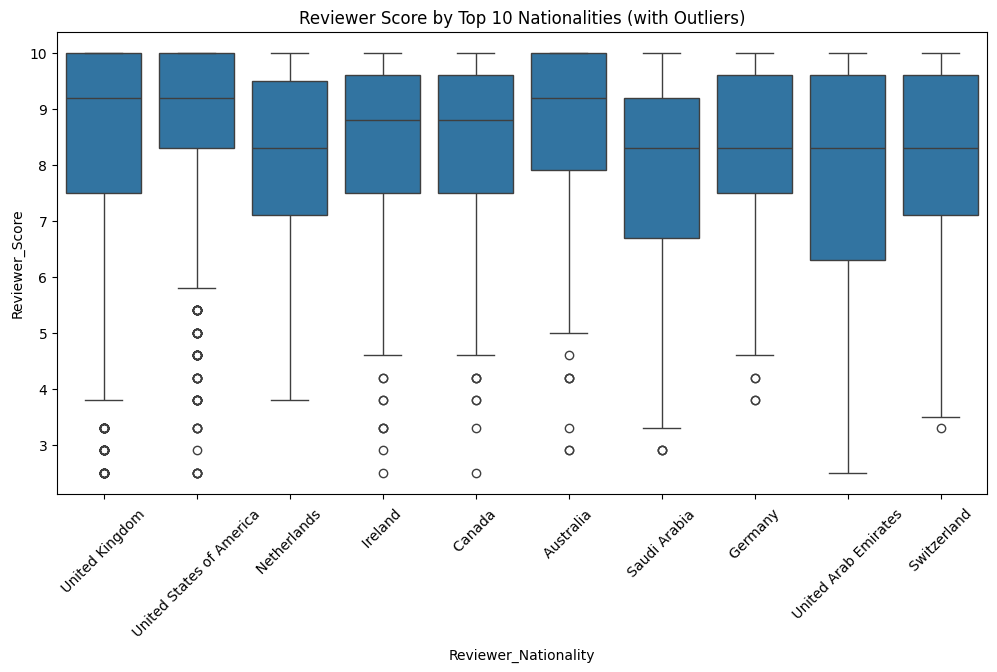

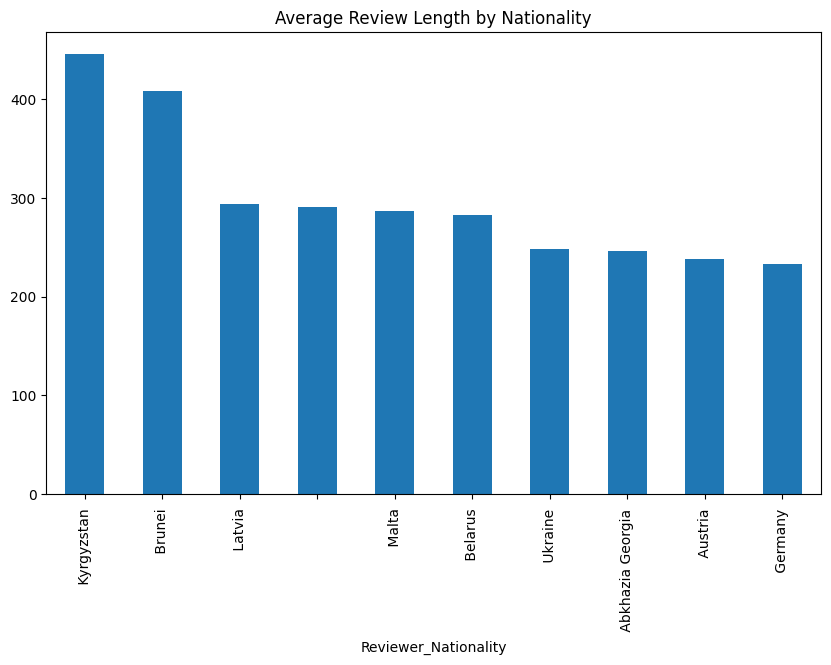

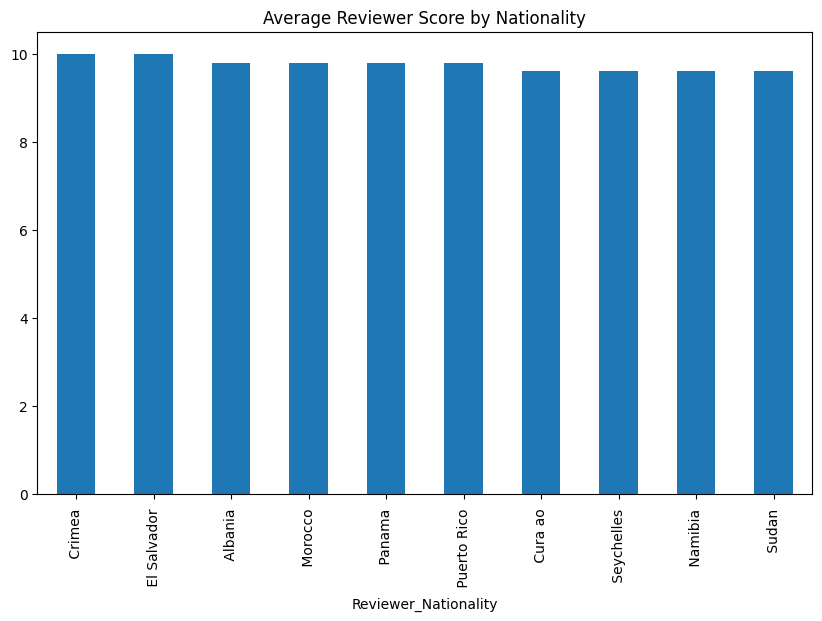

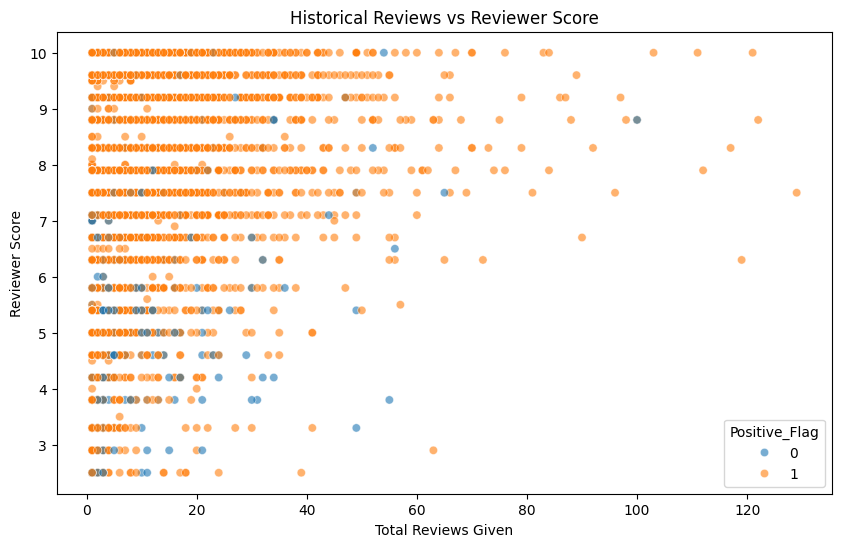

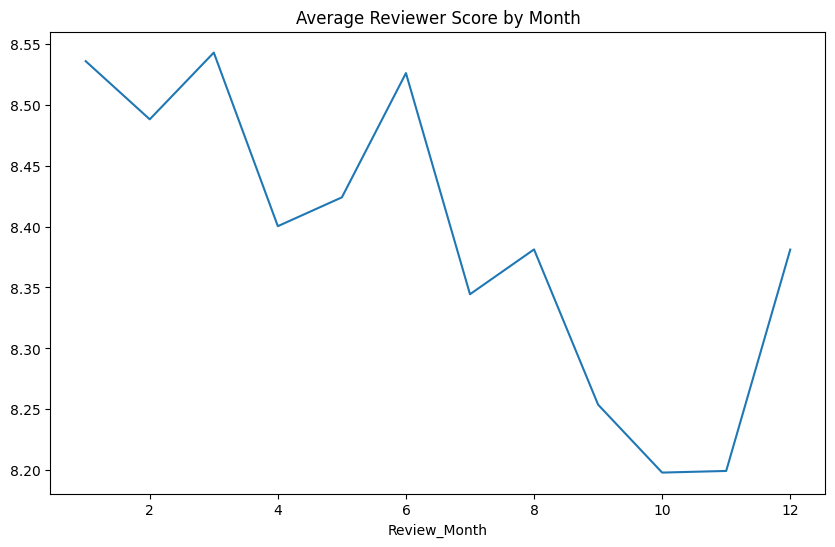

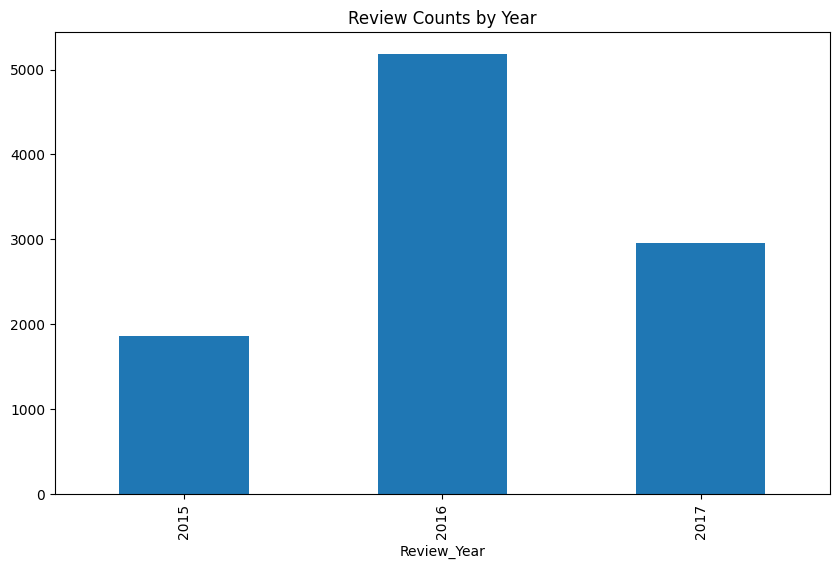

Is_Leisure_Trip  Is_Business_Trip
0                0                   8.084000
                 1                   7.932800
1                0                   8.490464
Name: Reviewer_Score, dtype: float64


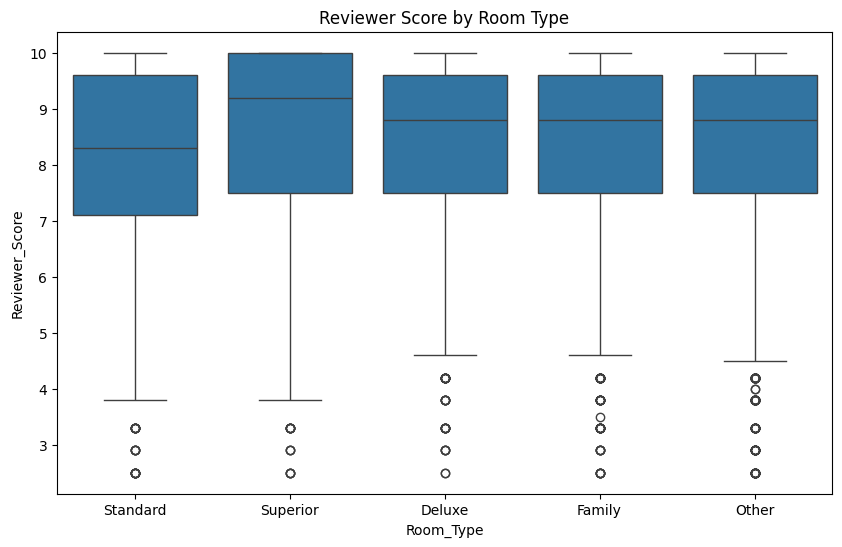

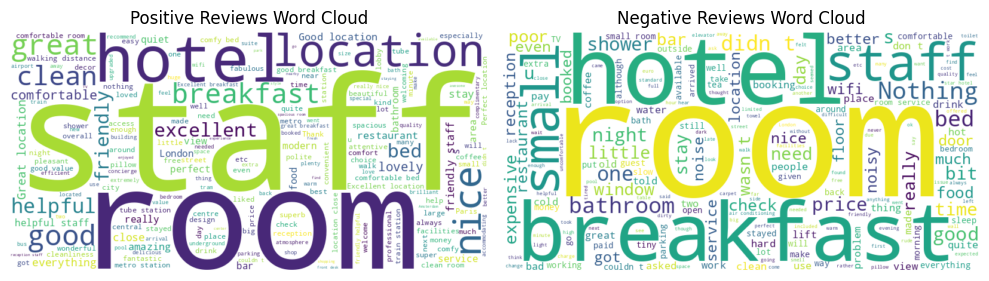

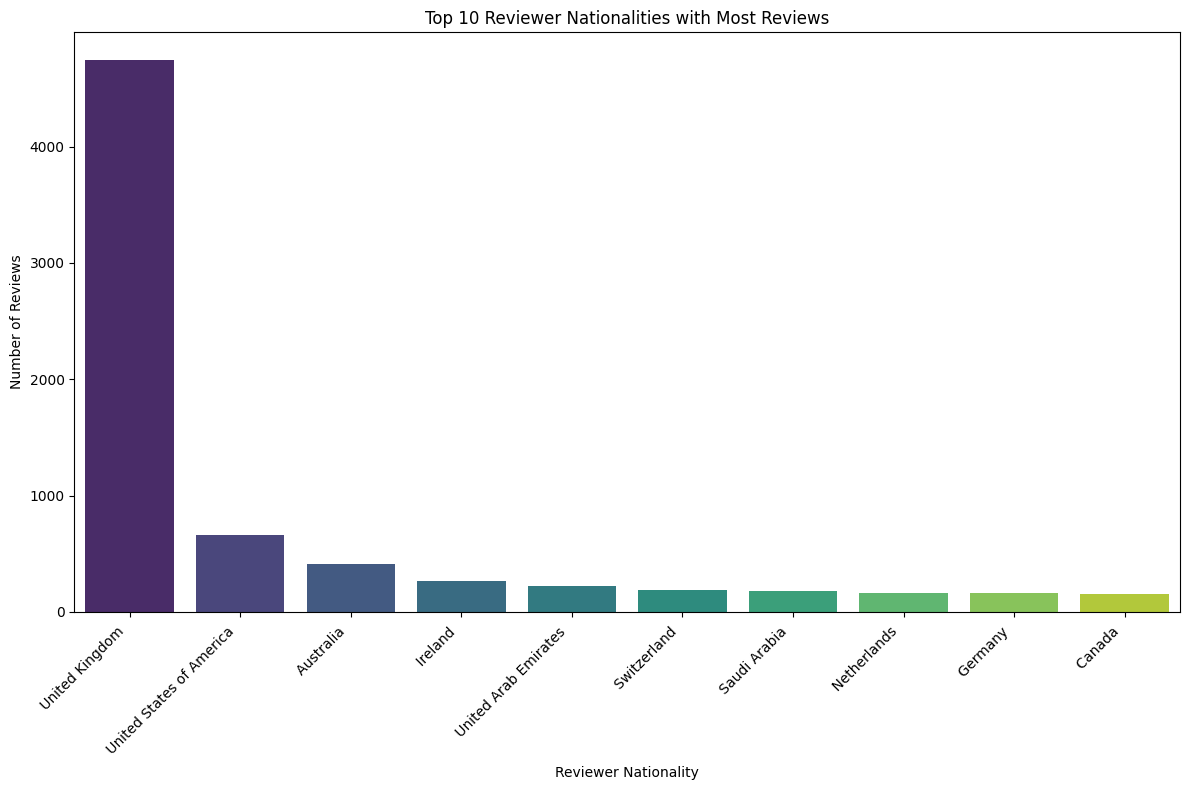

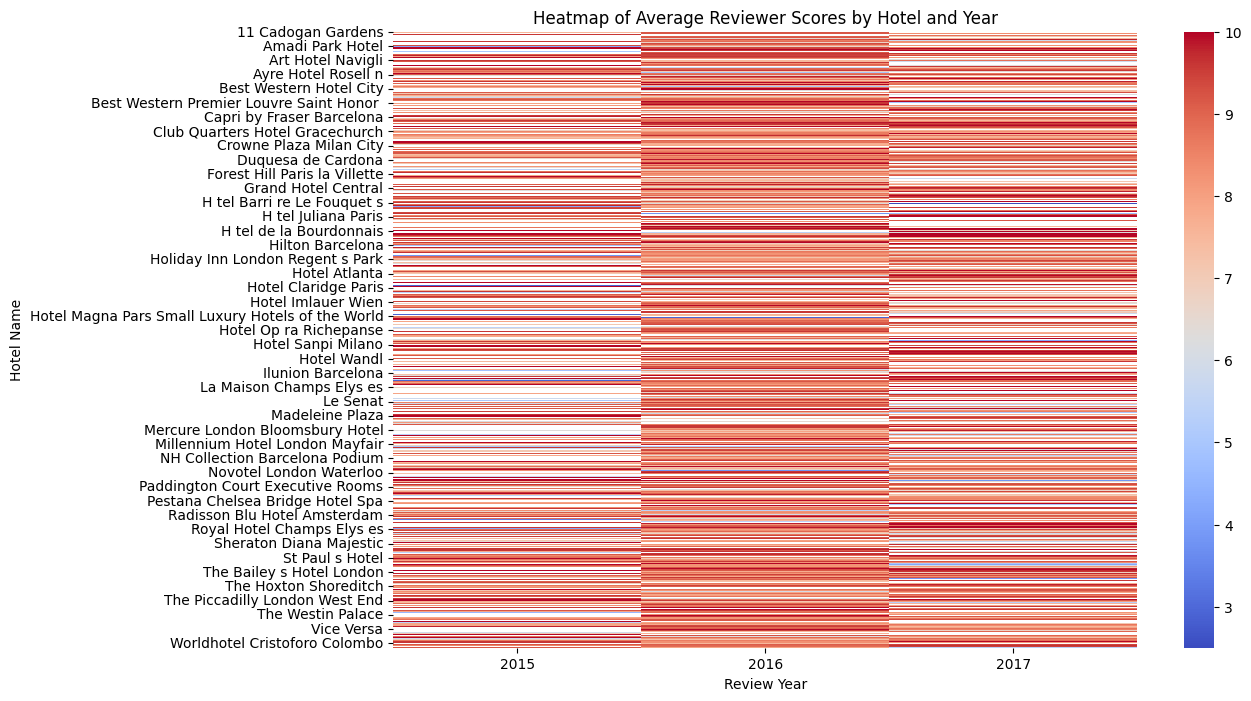


EDA completed in 8.99 seconds


In [6]:
#EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from datetime import datetime
import time
import re

start_time = time.time()
df = pd.read_csv('hotel_reviews.csv')

df['Review_Length'] = df['Negative_Review'].str.len() + df['Positive_Review'].str.len()
df['Review_Date'] = pd.to_datetime(df['Review_Date'])

df['Negative_Flag'] = df['Negative_Review'].apply(lambda x: 0 if x.strip().lower() in ['no negative', ''] else 1)
df['Positive_Flag'] = df['Positive_Review'].apply(lambda x: 0 if x.strip().lower() in ['no positive', ''] else 1)

# Research Question 1: Top Positively and Negatively Reviewed Hotels
top_positive_hotels = df.groupby('Hotel_Name')['Reviewer_Score'].mean().sort_values(ascending=False).head(10)
negative_counts = df.groupby('Hotel_Name')['Negative_Flag'].sum().sort_values(ascending=False).head(10)
positive_counts = df.groupby('Hotel_Name')['Positive_Flag'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
top_positive_hotels.plot(kind='bar', title='Top 10 Hotels by Average Reviewer Score')
plt.show()

plt.figure(figsize=(12, 6))
negative_counts.plot(kind='bar', title='Top 10 Hotels by Negative Mentions', color='red')
plt.show()

plt.figure(figsize=(12, 6))
positive_counts.plot(kind='bar', title='Top 10 Hotels by Positive Mentions', color='green')
plt.show()

# Research Question 2: Factors Influencing Reviewer Scores
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Top 10 Nationalities by Review Count
top_10_nationalities = df['Reviewer_Nationality'].value_counts().head(10).index
df_top_nationalities = df[df['Reviewer_Nationality'].isin(top_10_nationalities)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_top_nationalities, x='Reviewer_Nationality', y='Reviewer_Score', showfliers=True)
plt.xticks(rotation=45)
plt.title('Reviewer Score by Top 10 Nationalities (with Outliers)')
plt.show()

# Research Question 3: Review Length by Nationality
nationality_review_length = df.groupby('Reviewer_Nationality')['Review_Length'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
nationality_review_length.plot(kind='bar', title='Average Review Length by Nationality')
plt.show()

nationality_scores = df.groupby('Reviewer_Nationality')['Reviewer_Score'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
nationality_scores.plot(kind='bar', title='Average Reviewer Score by Nationality')
plt.show()

# Research Question 4: Likelihood of Positive/Negative Review
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Total_Number_of_Reviews_Reviewer_Has_Given', y='Reviewer_Score', hue='Positive_Flag', alpha=0.6)
plt.title('Historical Reviews vs Reviewer Score')
plt.xlabel('Total Reviews Given')
plt.ylabel('Reviewer Score')
plt.show()

# Research Question 5: Seasonal Trends
df['Review_Month'] = df['Review_Date'].dt.month
df['Review_Year'] = df['Review_Date'].dt.year

monthly_scores = df.groupby('Review_Month')['Reviewer_Score'].mean()
plt.figure(figsize=(10, 6))
monthly_scores.plot(kind='line', title='Average Reviewer Score by Month')
plt.show()

yearly_counts = df.groupby('Review_Year')['Reviewer_Score'].count()
plt.figure(figsize=(10, 6))
yearly_counts.plot(kind='bar', title='Review Counts by Year')
plt.show()

# Research Question 6: Attributes and Reviewer Scores
df['Is_Leisure_Trip'] = df['Tags'].str.contains('Leisure trip').astype(int)
df['Is_Business_Trip'] = df['Tags'].str.contains('Business trip').astype(int)

trip_type_scores = df.groupby(['Is_Leisure_Trip', 'Is_Business_Trip'])['Reviewer_Score'].mean()
print(trip_type_scores)

df['Room_Type'] = df['Tags'].str.extract(r"(Standard|Superior|Deluxe|Family)").fillna('Other')
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Room_Type', y='Reviewer_Score', order=['Standard', 'Superior', 'Deluxe', 'Family', 'Other'])
plt.title('Reviewer Score by Room Type')
plt.show()

# Word Clouds for Positive and Negative Reviews
positive_reviews = ' '.join(df[df['Positive_Flag'] == 1]['Positive_Review'].dropna())
negative_reviews = ' '.join(df[df['Negative_Flag'] == 1]['Negative_Review'].dropna())

positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)

plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Reviews Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Reviews Word Cloud')
plt.axis('off')

plt.tight_layout()
plt.show()

# Top 10 Nationalities by Review Count
nationality_counts = df['Reviewer_Nationality'].value_counts().head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=nationality_counts.index, y=nationality_counts.values, hue=nationality_counts.index, dodge=False, palette='viridis')
plt.title('Top 10 Reviewer Nationalities with Most Reviews')
plt.xlabel('Reviewer Nationality')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45, ha='right')
plt.legend().remove()  # Remove redundant legend
plt.tight_layout()
plt.show()

# Heatmap of Average Scores vs. Hotels
average_scores_by_hotel_year = df.groupby(['Hotel_Name', 'Review_Year'])['Reviewer_Score'].mean().unstack()
plt.figure(figsize=(12, 8))
sns.heatmap(average_scores_by_hotel_year, cmap='coolwarm', annot=False)
plt.title('Heatmap of Average Reviewer Scores by Hotel and Year')
plt.ylabel('Hotel Name')
plt.xlabel('Review Year')
plt.show()

if 'Hotel_Chain' in df.columns:
    avg_scores_by_chain = df.groupby('Hotel_Chain')['Reviewer_Score'].mean().sort_values(ascending=False)
    plt.figure(figsize=(12, 6))
    avg_scores_by_chain.plot(kind='bar', title='Average Reviewer Score by Hotel Chain')
    plt.show()
print(f"\nEDA completed in {time.time() - start_time:.2f} seconds")


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(



Reviewer_Score and Assigned Bins:
      Reviewer_Score Reviewer_Score_Bin
0                9.6            (9, 10]
1                8.8             (8, 9]
2                7.9             (7, 8]
3               10.0            (9, 10]
4                9.6            (9, 10]
...              ...                ...
9995            10.0            (9, 10]
9996             9.6            (9, 10]
9997             7.1             (7, 8]
9998             9.2            (9, 10]
9999            10.0            (9, 10]

[10000 rows x 2 columns]

Weighted_Score and Assigned Bins:
      Weighted_Score Weighted_Score_Bin
0          10.458926           (10, 11]
1           9.446987            (9, 10]
2           8.013631             (8, 9]
3          10.360434           (10, 11]
4          10.231250           (10, 11]
...              ...                ...
9995       10.605593           (10, 11]
9996        9.816150            (9, 10]
9997        7.432362             (7, 8]
9998        9.667630    

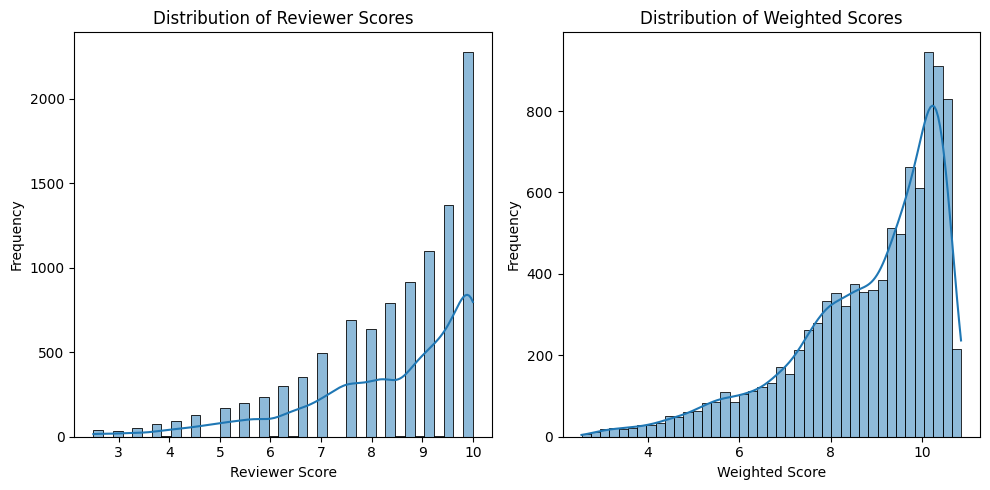

Feature engineering complete and data saved.


In [7]:
#Featured engineering
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import ast

df = pd.read_csv('hotel_reviews.csv', low_memory=False, dtype={'Hotel_Address': 'category', 'Reviewer_Score': 'float64', 'Positive_Review': 'category', 'Negative_Review': 'category'})

df.columns = df.columns.str.strip()

required_columns = ['Hotel_Address', 'Reviewer_Score', 'Positive_Review', 'Negative_Review']
for col in required_columns:
    if col not in df.columns:
        print(f"Warning: Missing column '{col}'")

# Function to extract city name
def extract_city(address):
    address_parts = address.split()
    return address_parts[-2]

df['City'] = df['Hotel_Address'].apply(extract_city)

#One-Hot Encoding
encoder = OneHotEncoder(drop='first', sparse=False)
city_encoded = encoder.fit_transform(df[['City']])

city_encoded_df = pd.DataFrame(city_encoded, columns=encoder.get_feature_names_out(['City']))

df = pd.concat([df, city_encoded_df], axis=1)

#Review Lengths
df['Positive_Review_Length'] = df['Positive_Review'].str.len()
df['Negative_Review_Length'] = df['Negative_Review'].str.len()
df['Total_Review_Length'] = df['Positive_Review_Length'] + df['Negative_Review_Length']

#Temporal Features
df['Review_Date'] = pd.to_datetime(df['Review_Date'], errors='coerce')
df['Review_Month'] = df['Review_Date'].dt.month
df['Review_Weekday'] = df['Review_Date'].dt.weekday
df['Is_Holiday_Season'] = df['Review_Month'].apply(lambda x: 1 if x in [12, 1] else 0)

#the mean of 'Total_Number_of_Reviews'
C = df['Total_Number_of_Reviews'].mean()

#Weighted_Score
df['Weighted_Score'] = df.apply(
    lambda row: row['Reviewer_Score'] + (row['Total_Number_of_Reviews'] / (row['Total_Number_of_Reviews'] + C)),
    axis=1
)

df['Reviewer_Score'] = df['Reviewer_Score'].bfill()
df['Weighted_Score'] = df['Weighted_Score'].bfill()

# the bin edges for Reviewer_Score and Weighted_Score
reviewer_score_min, reviewer_score_max = int(df['Reviewer_Score'].min()), int(df['Reviewer_Score'].max())
weighted_score_min, weighted_score_max = int(df['Weighted_Score'].min()), int(df['Weighted_Score'].max())

reviewer_score_max += 1
weighted_score_max += 1

reviewer_score_bins = pd.cut(df['Reviewer_Score'], bins=range(reviewer_score_min, reviewer_score_max + 1), right=True, include_lowest=True)
weighted_score_bins = pd.cut(df['Weighted_Score'], bins=range(weighted_score_min, weighted_score_max + 1), right=True, include_lowest=True)

df['Reviewer_Score_Bin'] = reviewer_score_bins
df['Weighted_Score_Bin'] = weighted_score_bins

df['Reviewer_Score_Bin'] = df['Reviewer_Score_Bin'].apply(lambda x: f"({int(x.left)}, {int(x.right)}]" if isinstance(x, pd.Interval) else x)
df['Weighted_Score_Bin'] = df['Weighted_Score_Bin'].apply(lambda x: f"({int(x.left)}, {int(x.right)}]" if isinstance(x, pd.Interval) else x)

print("\nReviewer_Score and Assigned Bins:")
print(df[['Reviewer_Score', 'Reviewer_Score_Bin']])

print("\nWeighted_Score and Assigned Bins:")
print(df[['Weighted_Score', 'Weighted_Score_Bin']])

print("\nUnique Reviewer_Score_Bin categories:")
print(df['Reviewer_Score_Bin'].unique())

print("\nUnique Weighted_Score_Bin categories:")
print(df['Weighted_Score_Bin'].unique())

df['Reviewer_Bin_Start'] = df['Reviewer_Score_Bin'].apply(lambda x: int(x.split(',')[0][1:]))
df['Weighted_Bin_Start'] = df['Weighted_Score_Bin'].apply(lambda x: int(x.split(',')[0][1:]))

df.sort_values(by=['Reviewer_Bin_Start', 'Weighted_Bin_Start'], inplace=True)

df.reset_index(drop=True, inplace=True)

df['Reviewer_Score_Bin'] = pd.Categorical(df['Reviewer_Score_Bin'],
                                           categories=sorted(df['Reviewer_Score_Bin'].unique(),
                                           key=lambda x: (int(x.split(',')[0][1:]), int(x.split(',')[1][:-1]))),
                                           ordered=True)

df['Weighted_Score_Bin'] = pd.Categorical(df['Weighted_Score_Bin'],
                                           categories=sorted(df['Weighted_Score_Bin'].unique(),
                                           key=lambda x: (int(x.split(',')[0][1:]), int(x.split(',')[1][:-1]))),
                                           ordered=True)

df['Reviewer_Score_Bin_Label'] = pd.factorize(df['Reviewer_Score_Bin'])[0]
df['Weighted_Score_Bin_Label'] = pd.factorize(df['Weighted_Score_Bin'])[0]

df['Reviewer_Score_Bin_Label'] = df['Reviewer_Score_Bin_Label'].astype(int)
df['Weighted_Score_Bin_Label'] = df['Weighted_Score_Bin_Label'].astype(int)

print("\nUpdated DataFrame with Bin Labels:")
print(df[['Reviewer_Score_Bin', 'Reviewer_Score_Bin_Label', 'Weighted_Score_Bin', 'Weighted_Score_Bin_Label']])

print(f"\nData type of 'Reviewer_Score_Bin_Label': {df['Reviewer_Score_Bin_Label'].dtype}")
print(f"Data type of 'Weighted_Score_Bin_Label': {df['Weighted_Score_Bin_Label'].dtype}")

def parse_tags_as_list(tag_string):
    """Convert string representation of list to actual list and clean tags."""
    try:
        tags_list = ast.literal_eval(tag_string)
        cleaned_tags = [tag.strip().strip("'") for tag in tags_list]
        return cleaned_tags
    except (ValueError, SyntaxError) as e:
        print(f"Error processing tag: {tag_string} | Error: {e}")
        return []

df['Tags'] = df['Tags'].apply(parse_tags_as_list)

tags_encoded_df = df['Tags'].apply(pd.Series).stack().str.get_dummies()

# Group by columns
tags_encoded_df = tags_encoded_df.T.groupby(tags_encoded_df.columns).sum().T

tags_encoded_df.columns = ['Tags_' + str(col) for col in tags_encoded_df.columns]

df = pd.concat([df, tags_encoded_df], axis=1)

df[tags_encoded_df.columns] = df[tags_encoded_df.columns].fillna(0)

df[tags_encoded_df.columns] = df[tags_encoded_df.columns].fillna(0)

reviewer_nationality_encoded_df = pd.get_dummies(df['Reviewer_Nationality'], drop_first=False)
reviewer_nationality_encoded_df.columns = ['Reviewer_Nationality_' + col.strip() for col in reviewer_nationality_encoded_df.columns]

df = pd.concat([df, reviewer_nationality_encoded_df], axis=1)

df[reviewer_nationality_encoded_df.columns] = df[reviewer_nationality_encoded_df.columns].fillna(0).astype(int)

df[reviewer_nationality_encoded_df.columns] = df[reviewer_nationality_encoded_df.columns].fillna(0)

print(df.head())
# Visualize the distribution of scores
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['Reviewer_Score'], bins='auto', kde=True)
plt.title('Distribution of Reviewer Scores')
plt.xlabel('Reviewer Score')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df['Weighted_Score'], bins='auto', kde=True)
plt.title('Distribution of Weighted Scores')
plt.xlabel('Weighted Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

df.to_csv('hotel_reviews_featured.csv', index=False)
print("Feature engineering complete and data saved.")





In [8]:

df = pd.read_csv('hotel_reviews_featured.csv', low_memory=False)
print(df.columns.tolist())

['Hotel_Address', 'Additional_Number_of_Scoring', 'Review_Date', 'Average_Score', 'Hotel_Name', 'Reviewer_Nationality', 'Negative_Review', 'Review_Total_Negative_Word_Counts', 'Total_Number_of_Reviews', 'Positive_Review', 'Review_Total_Positive_Word_Counts', 'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'Tags', 'days_since_review', 'lat', 'lng', 'Positive_Review_Tokenized', 'Negative_Review_Tokenized', 'Positive_Review_Length', 'Negative_Review_Length', 'Review_Length', 'City', 'City_Barcelona', 'City_Milan', 'City_Paris', 'City_United', 'City_Vienna', 'Total_Review_Length', 'Review_Month', 'Review_Weekday', 'Is_Holiday_Season', 'Weighted_Score', 'Reviewer_Score_Bin', 'Weighted_Score_Bin', 'Reviewer_Bin_Start', 'Weighted_Bin_Start', 'Reviewer_Score_Bin_Label', 'Weighted_Score_Bin_Label', 'Tags_2 rooms', 'Tags_3 rooms', 'Tags_4 rooms', 'Tags_Accessible Queen Guest Room', 'Tags_Aldwych Double Twin Room', 'Tags_Ambassador Junior Suite', 'Tags_Andaz Double Room', 'Tags_An

In [9]:
#columns after feature engineering
df = pd.read_csv('hotel_reviews_featured.csv', low_memory=False)

numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

categorical_columns = df.select_dtypes(include=['object']).columns

print("Numeric Columns:")
print(numeric_columns)

print("\nCategorical Columns:")
print(categorical_columns)

Numeric Columns:
Index(['Additional_Number_of_Scoring', 'Average_Score',
       'Review_Total_Negative_Word_Counts', 'Total_Number_of_Reviews',
       'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'lat',
       'lng', 'Positive_Review_Length',
       ...
       'Reviewer_Nationality_Trinidad and Tobago',
       'Reviewer_Nationality_Tunisia', 'Reviewer_Nationality_Turkey',
       'Reviewer_Nationality_Ukraine',
       'Reviewer_Nationality_United Arab Emirates',
       'Reviewer_Nationality_United Kingdom',
       'Reviewer_Nationality_United States of America',
       'Reviewer_Nationality_Venezuela', 'Reviewer_Nationality_Vietnam',
       'Reviewer_Nationality_Yemen'],
      dtype='object', length=1114)

Categorical Columns:
Index(['Hotel_Address', 'Review_Date', 'Hotel_Name', 'Reviewer_Nationality',
       'Negative_Review', 'Positive_Review', 'Tags', 'days_since_review',
       'Positive_Review_Tokenized', 'Negative_Revi

In [10]:
#info abour target variable
df = pd.read_csv('hotel_reviews_featured.csv', low_memory=False)
import pandas as pd

score_distribution = df['Reviewer_Score_Bin_Label'].value_counts().sort_index()

def describe_distribution(distribution):
    description = []
    total_reviews = distribution.sum()

    description.append(f"There are a total of {total_reviews} reviews in the dataset.")

    for score_bin, count in distribution.items():
        percentage = (count / total_reviews) * 100
        description.append(f"The score bin '{score_bin}' has {count} reviews, which is approximately {percentage:.2f}% of the total reviews.")

    return "\n".join(description)

distribution_description = describe_distribution(score_distribution)

print(distribution_description)


There are a total of 10000 reviews in the dataset.
The score bin '0.0' has 75 reviews, which is approximately 0.75% of the total reviews.
The score bin '1.0' has 131 reviews, which is approximately 1.31% of the total reviews.
The score bin '2.0' has 395 reviews, which is approximately 3.95% of the total reviews.
The score bin '3.0' has 442 reviews, which is approximately 4.42% of the total reviews.
The score bin '4.0' has 671 reviews, which is approximately 6.71% of the total reviews.
The score bin '5.0' has 1811 reviews, which is approximately 18.11% of the total reviews.
The score bin '6.0' has 1724 reviews, which is approximately 17.24% of the total reviews.
The score bin '7.0' has 4751 reviews, which is approximately 47.51% of the total reviews.


Fitting 3 folds for each of 24 candidates, totalling 72 fits

F1 Score (Random Forest): 0.9049

Confusion Matrix (Random Forest):
 [[   0    1    2    1    4    2    0    5]
 [   0    1    2    5    0    6    0   12]
 [   1    3    8    7   10   29    0   21]
 [   2    1    6   10   10   35    0   25]
 [   0    2    8    9   13   48    0   54]
 [   1    3   10   18   29   98    0  203]
 [   0    5    9   14   20   94 9152  207]
 [   1    2   17   22   29  115    0  764]]

Top 10 Most Positive Hotel Companies (Based on Reviews):
                                                   total_reviews  \
Hotel_Name                                                         
St James Court A Taj Hotel London                             16   
Park Grand London Kensington                                  15   
Park Grand Paddington Court                                   11   
citizenM Tower of London                                      10   
The Grosvenor                                             

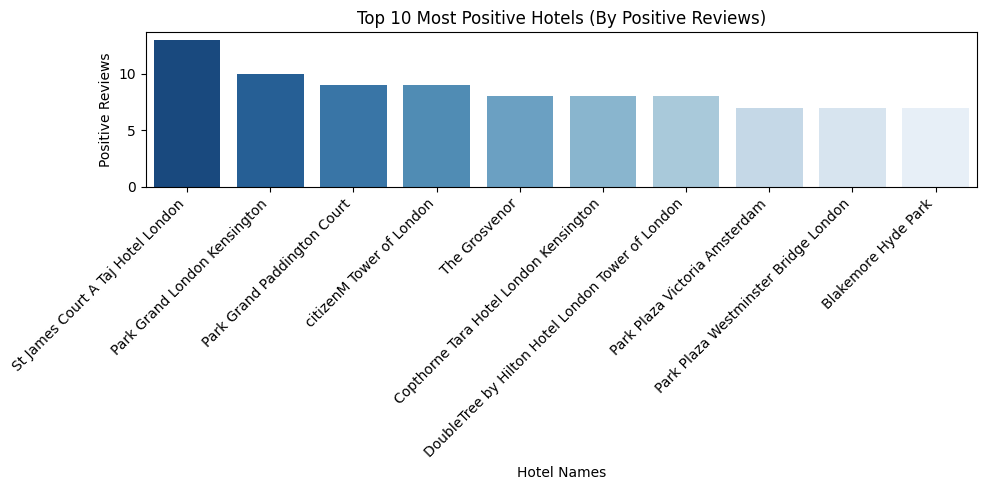

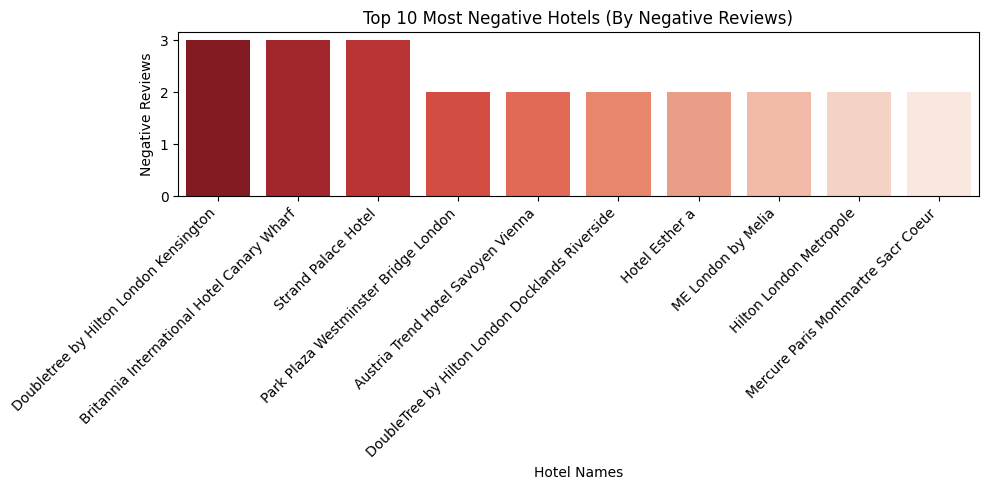

In [24]:
#1.Which hotel company names are the most positively and negatively reviewed?
!pip install matplotlib seaborn scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('hotel_reviews_featured.csv', low_memory=False)

# Handle NaN values
numerical_cols = df.select_dtypes(include=['number']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

df['Positive_Review'] = df['Positive_Review'].replace(np.nan, 'No Positive')
df['Negative_Review'] = df['Negative_Review'].replace(np.nan, 'No Negative')

X = df[['Hotel_Name', 'Positive_Review', 'Negative_Review']]  # Features
y = df['Reviewer_Score_Bin_Label']  # Target

# Encode
hotel_name_encoder = LabelEncoder()
X.loc[:, 'Hotel_Name'] = hotel_name_encoder.fit_transform(X['Hotel_Name'])

positive_review_encoder = LabelEncoder()
X.loc[:, 'Positive_Review'] = positive_review_encoder.fit_transform(X['Positive_Review'])

negative_review_encoder = LabelEncoder()
X.loc[:, 'Negative_Review'] = negative_review_encoder.fit_transform(X['Negative_Review'])

# Encode
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

#the best hyperparameters
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, scoring='f1_weighted', verbose=1)
grid_search.fit(X_train, y_train)

# Best model
best_rf_model = grid_search.best_estimator_

# Predict on the test set
y_pred = best_rf_model.predict(X_test)

X_test['Predicted'] = y_pred
X_test['Actual'] = y_test

X_test['Hotel_Name'] = hotel_name_encoder.inverse_transform(X_test['Hotel_Name'].astype(int))
X_test['Predicted_Label'] = label_encoder.inverse_transform(X_test['Predicted'])
X_test['Actual_Label'] = label_encoder.inverse_transform(X_test['Actual'])

# F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"\nF1 Score (Random Forest): {f1:.4f}")

# Confusion Matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix (Random Forest):\n", confusion_mat)

review_scores = X_test.groupby('Hotel_Name').agg(
    total_reviews=('Actual', 'count'),
    positive_reviews=('Predicted', lambda x: (x == 7).sum()),
    negative_reviews=('Predicted', lambda x: (x < 4).sum())
)

company_reviews = review_scores.sort_values(by='positive_reviews', ascending=False)

print("\nTop 10 Most Positive Hotel Companies (Based on Reviews):")
print(company_reviews.head(10))

print("\nTop 10 Most Negative Hotel Companies (Based on Reviews):")
print(company_reviews.tail(10))

def plot_top_hotels(review_scores):
    positive_top_10 = review_scores.sort_values(by='positive_reviews', ascending=False).head(10)
    negative_top_10 = review_scores.sort_values(by='negative_reviews', ascending=False).head(10)

    # Bar Chart for Positive Reviews
    plt.figure(figsize=(10, 5))
    sns.barplot(x=positive_top_10.index, y=positive_top_10['positive_reviews'], palette='Blues_r', hue=positive_top_10.index)
    plt.title("Top 10 Most Positive Hotels (By Positive Reviews)")
    plt.ylabel("Positive Reviews")
    plt.xlabel("Hotel Names")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # Bar Chart for Negative Reviews
    plt.figure(figsize=(10, 5))
    sns.barplot(x=negative_top_10.index, y=negative_top_10['negative_reviews'], palette='Reds_r', hue=negative_top_10.index)
    plt.title("Top 10 Most Negative Hotels (By Negative Reviews)")
    plt.ylabel("Negative Reviews")
    plt.xlabel("Hotel Names")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

plot_top_hotels(review_scores)

Fitting 2 folds for each of 5 candidates, totalling 10 fits


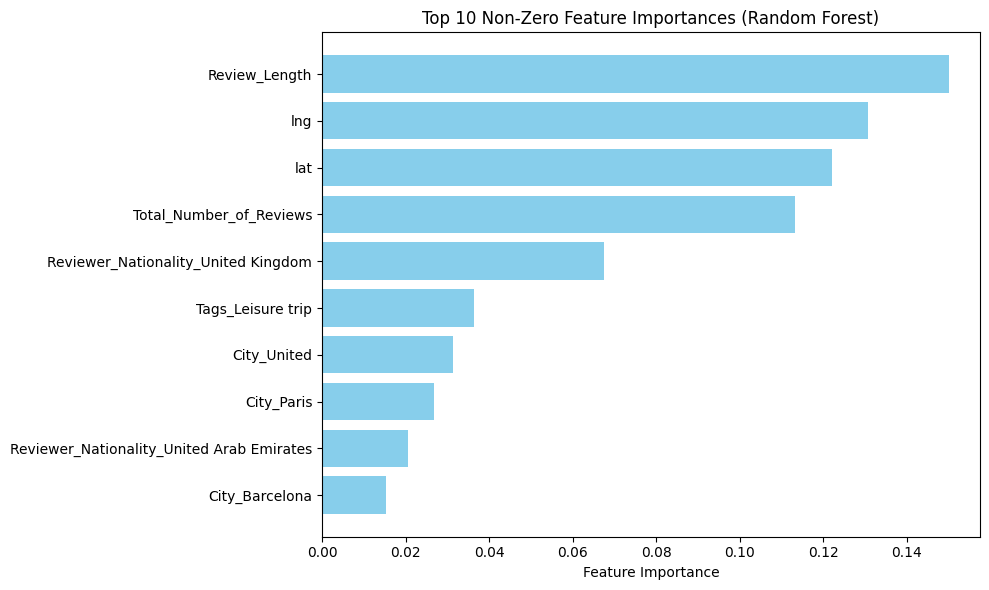

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.83      0.91       521
           1       0.08      0.67      0.14         6
           2       0.26      0.61      0.37        31

    accuracy                           0.82       558
   macro avg       0.45      0.70      0.47       558
weighted avg       0.95      0.82      0.87       558


Confusion Matrix:
[[434  35  52]
 [  0   4   2]
 [  1  11  19]]

Balanced Accuracy: 0.7041944427245647
Weighted F1-score: 0.8695804783839606


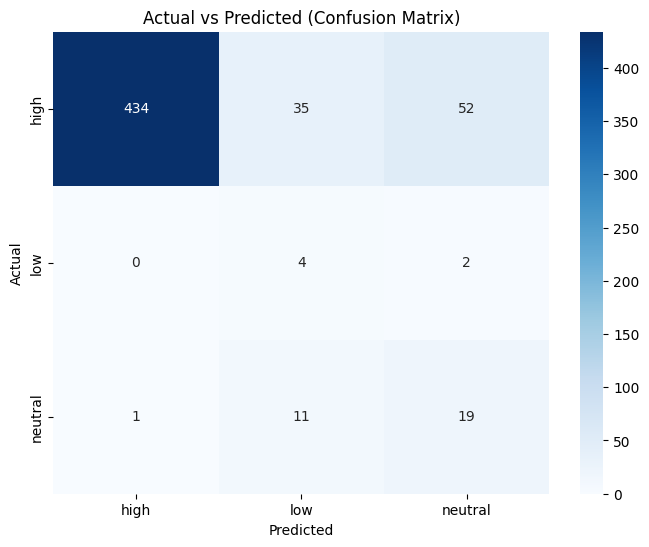

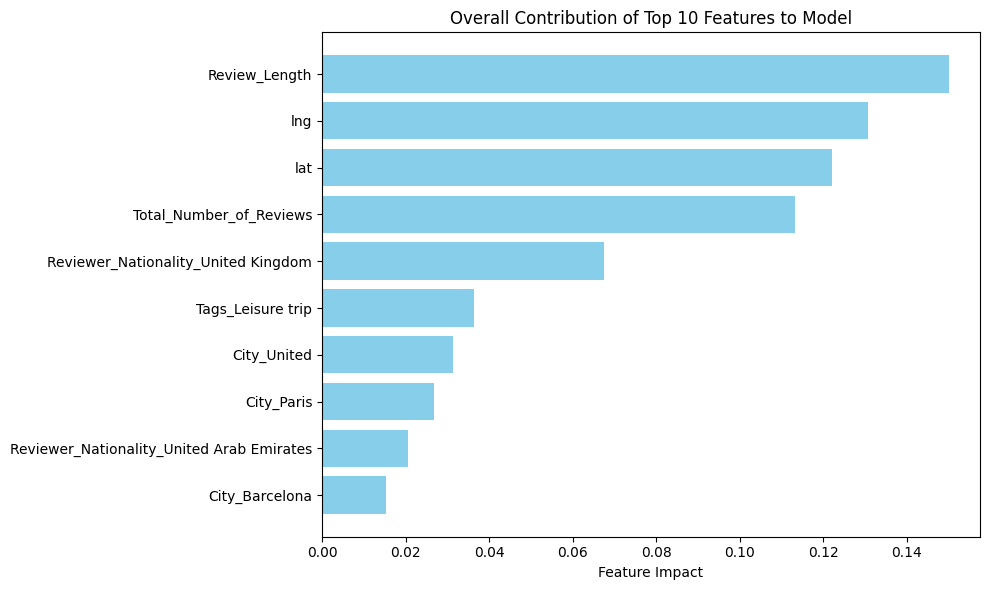

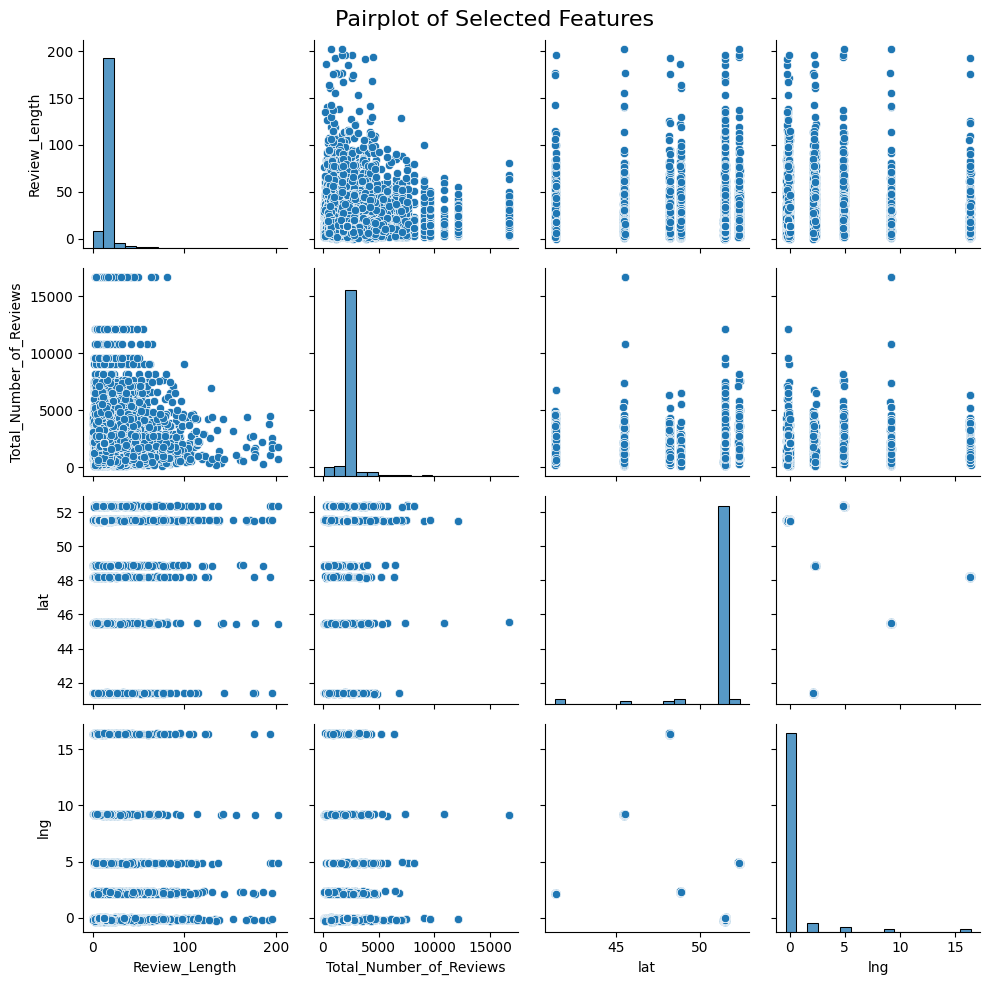

Cross-Validation Scores: [0.88877327 0.90038749 0.90290189]
Mean Cross-Validation Score: 0.8973542160269016


In [16]:
#2.Which of the main factors(Features)contribute to reviewer score #feature importance?
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, balanced_accuracy_score, f1_score
import seaborn as sns
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline

df = pd.read_csv('hotel_reviews_featured.csv', low_memory=False)

# Handle missing values
numerical_cols = df.select_dtypes(include=['number']).columns
imputer = SimpleImputer(strategy='median')
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])

categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

def simplify_labels(score):
    if score in [0.0, 1.0, 2.0]:
        return "low"
    elif score in [3.0, 4.0, 5.0]:
        return "neutral"
    else:
        return "high"

le = LabelEncoder()
simplified_scores = df['Reviewer_Score_Bin_Label'].apply(simplify_labels)
simplified_scores_encoded = le.fit_transform(simplified_scores)

df = pd.concat([df, pd.DataFrame({
    'Simplified_Score': simplified_scores,
    'Simplified_Score_Encoded': simplified_scores_encoded
})], axis=1)

#features and target variable
city_columns = [col for col in df.columns if col.startswith('City_')]
tags_columns = [col for col in df.columns if col.startswith('Tags_')]
nationality_columns = [col for col in df.columns if col.startswith('Reviewer_Nationality_')]

X = df[['Review_Length', 'Total_Number_of_Reviews', 'lat', 'lng'] + city_columns + tags_columns + nationality_columns]
y = df['Simplified_Score_Encoded']

df_sample = df.sample(frac=0.05, random_state=42)
X_sample = df_sample[['Review_Length', 'Total_Number_of_Reviews', 'lat', 'lng'] + city_columns + tags_columns + nationality_columns]
y_sample = df_sample['Simplified_Score_Encoded']

# Stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42, stratify=y_sample)

#class weights
class_weights = {0: 1.0, 1: 2.0, 2: 3.0}

pipeline = ImbPipeline([
    ('undersample', RandomUnderSampler(sampling_strategy='auto', random_state=42)),
    ('oversample', SMOTE(sampling_strategy='auto', random_state=42)),
    ('rf', RandomForestClassifier(random_state=42, class_weight=class_weights))
])

# Parameter grid for RandomizedSearchCV
param_dist = {
    'rf__n_estimators': [50, 100],
    'rf__max_depth': [5, 10, None],
    'rf__min_samples_split': [2, 5],
    'rf__min_samples_leaf': [1, 2],
    'rf__max_features': ['sqrt'],
    'rf__max_leaf_nodes': [None, 10],
    'rf__min_impurity_decrease': [0.0, 0.01]
}

# Fit the model and get the best model from RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=pipeline, param_distributions=param_dist,
                                   n_iter=5, cv=2, verbose=1, random_state=42, n_jobs=-1, scoring='f1_weighted')
random_search.fit(X_train, y_train)
best_model = random_search.best_estimator_

#feature importances from the best Random Forest model
feature_importances = best_model.named_steps['rf'].feature_importances_

non_zero_indices = np.where(feature_importances > 0)[0]
non_zero_importances = feature_importances[non_zero_indices]
non_zero_features = X.columns[non_zero_indices]

#top 10 features
sorted_indices = np.argsort(non_zero_importances)[-10:]
top_features = non_zero_features[sorted_indices]
top_importances = non_zero_importances[sorted_indices]

#top 10  feature importances
plt.figure(figsize=(10, 6))
plt.barh(top_features, top_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Top 10 Non-Zero Feature Importances (Random Forest)')
plt.tight_layout()
plt.show()

y_pred = best_model.predict(X_test)

# Evaluation
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nBalanced Accuracy:", balanced_accuracy_score(y_test, y_pred))
print("Weighted F1-score:", f1_score(y_test, y_pred, average='weighted'))

#Actual vs Predicted (Confusion Matrix Heatmap)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Actual vs Predicted (Confusion Matrix)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Bar Chart of Feature Impact (Overall Contribution of Top 10 Features)
plt.figure(figsize=(10, 6))
plt.barh(top_features, top_importances, color='skyblue')
plt.xlabel('Feature Impact')
plt.title('Overall Contribution of Top 10 Features to Model')
plt.tight_layout()
plt.show()

# Pairplot Visualization
selected_pairplot_features = ['Review_Length', 'Total_Number_of_Reviews', 'lat', 'lng']
sns.pairplot(df[selected_pairplot_features])
plt.suptitle('Pairplot of Selected Features', size=16)
plt.tight_layout()
plt.show()

# Cross-validation
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
cv_scores = cross_val_score(best_model, X_train, y_train, cv=cv, scoring='f1_weighted', n_jobs=-1)

print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Score: {cv_scores.mean()}")




Descriptive Statistics of Review Length:
count    10000.000000
mean        18.514400
std         18.487406
min          0.000000
25%          7.000000
50%         13.000000
75%         23.000000
max        202.000000
Name: Review_Length, dtype: float64


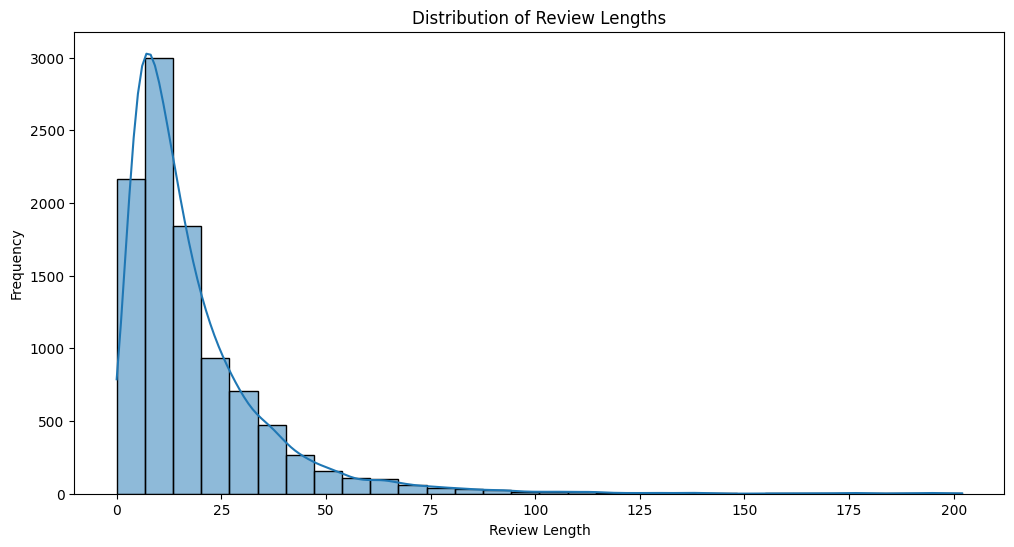

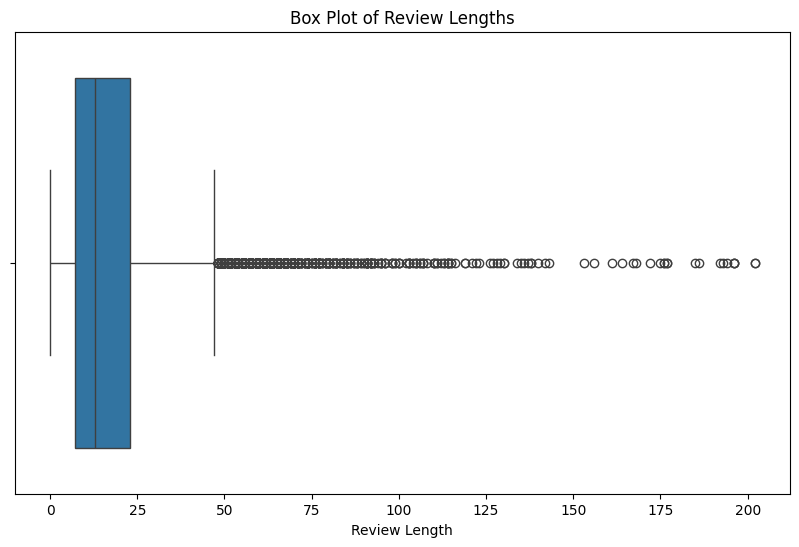


Range of Review Length:
Minimum: 0.0
Maximum: 202.0

Percentiles:
0.25     7.0
0.50    13.0
0.75    23.0
0.90    38.0
0.95    51.0
0.99    91.0
Name: Review_Length, dtype: float64


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('hotel_reviews_featured.csv', low_memory=False)

# Descriptive statistics of Review_Length
print("Descriptive Statistics of Review Length:")
print(df['Review_Length'].describe())

# the distribution of Review_Length
plt.figure(figsize=(12, 6))
sns.histplot(df['Review_Length'], kde=True, bins=30)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Review_Length'])
plt.title('Box Plot of Review Lengths')
plt.xlabel('Review Length')
plt.show()
print("\nRange of Review Length:")
print(f"Minimum: {df['Review_Length'].min()}")
print(f"Maximum: {df['Review_Length'].max()}")
print(f"\nPercentiles:")
print(df['Review_Length'].quantile([0.25, 0.5, 0.75, 0.9, 0.95, 0.99]))


Fitting 2 folds for each of 5 candidates, totalling 10 fits
Best Parameters for Review Length: {'classifier__n_estimators': 200, 'classifier__min_samples_split': 10, 'classifier__min_samples_leaf': 1, 'classifier__max_features': 'sqrt', 'classifier__max_depth': None}

Classification Report (Review Length):
              precision    recall  f1-score   support

        Long       0.07      0.18      0.10        11
      Medium       0.18      0.62      0.28        37
       Short       0.98      0.91      0.94      1013
  Very Short       0.09      0.02      0.03        55

    accuracy                           0.85      1116
   macro avg       0.33      0.43      0.34      1116
weighted avg       0.90      0.85      0.87      1116

Balanced Accuracy (Review Length): 0.43368773511912695
F1 Score (Review Length): 0.8680808813058711
Fitting 2 folds for each of 5 candidates, totalling 10 fits

Best Parameters for Reviewer Score: {'classifier__n_estimators': 200, 'classifier__min_samples_s

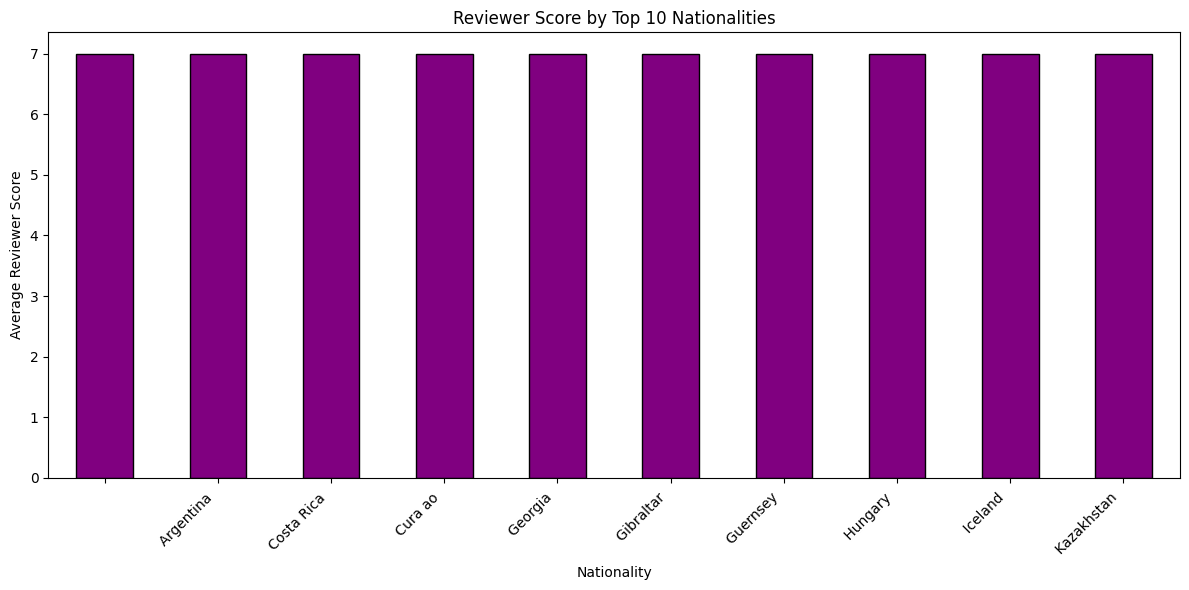

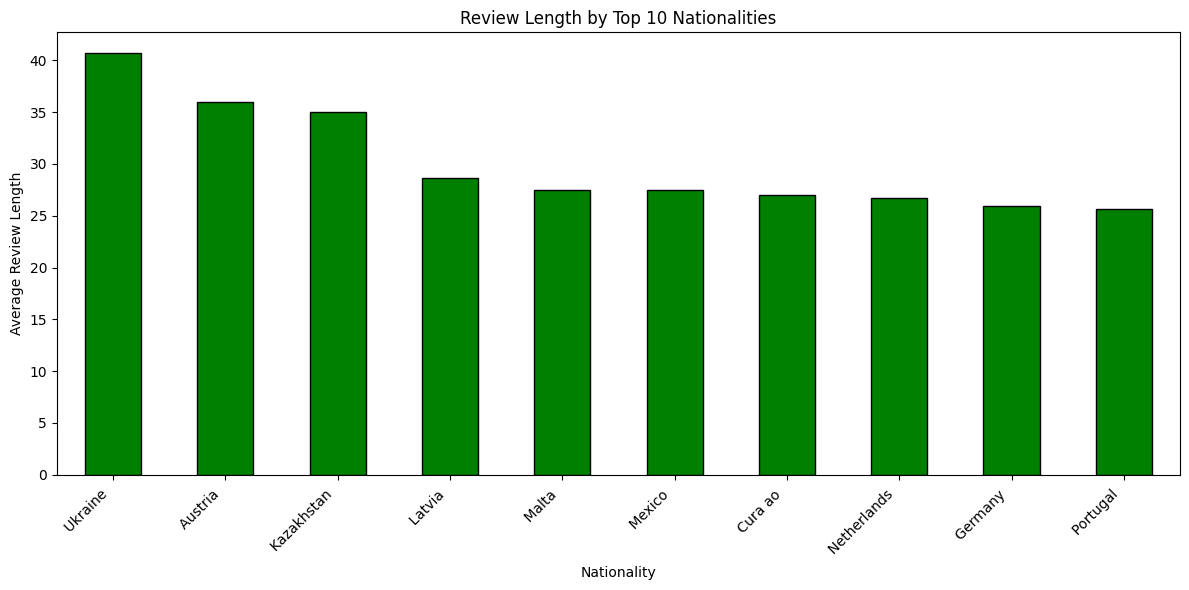

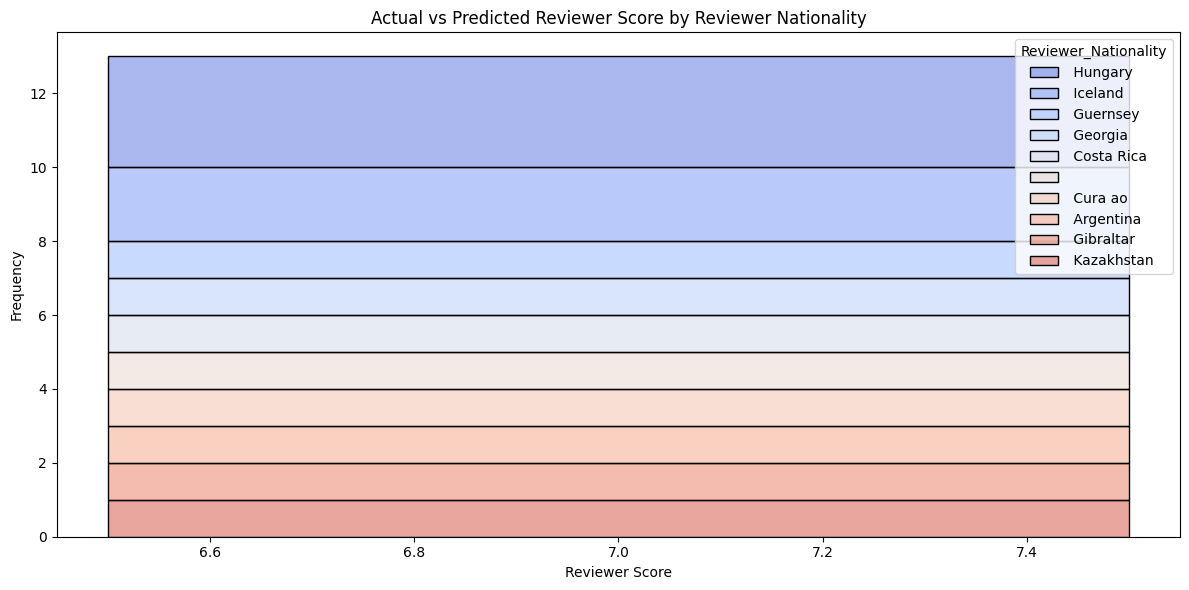

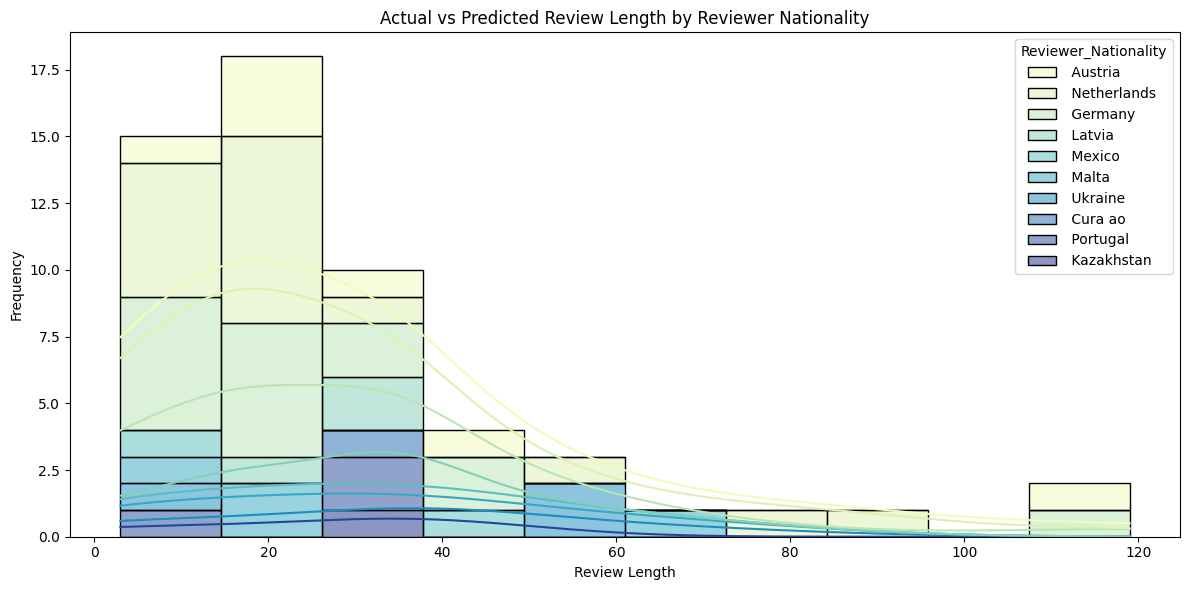

In [18]:
#3.How does review length vary by nationality and How does review length vary by nationality? Do reviewers from certain nationality rate certain hotels higher and lower?

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, balanced_accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline

df = pd.read_csv('hotel_reviews_featured.csv', low_memory=False)
df = df.sample(frac=0.1, random_state=42)

# Handle missing values
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

bins = [0, 7, 23, 51, 202]
labels = ['Very Short', 'Short', 'Medium', 'Long']
review_length_cat = pd.cut(df['Review_Length'], bins=bins, labels=labels, include_lowest=True)

score_category = pd.cut(df['Reviewer_Score_Bin_Label'], bins=[-1, 2, 4, 7], labels=['Lower', 'Neutral', 'Positive'])

df = pd.concat([df, review_length_cat.rename('Review_Length_Cat'), score_category.rename('Score_Category')], axis=1)

nationality_columns = [col for col in df.columns if col.startswith('Reviewer_Nationality_')]

X = df[nationality_columns]
y_length = df['Review_Length_Cat'].astype('category')
y_score = df['Score_Category'].astype('category')

X_train_length, X_test_length, y_train_length, y_test_length = train_test_split(X, y_length, test_size=0.2, random_state=42, stratify=y_length)
X_train_score, X_test_score, y_train_score, y_test_score = train_test_split(X, y_score, test_size=0.2, random_state=42, stratify=y_score)

#standardization
scaler = StandardScaler()
X_train_length_scaled = scaler.fit_transform(X_train_length)
X_test_length_scaled = scaler.transform(X_test_length)
X_train_score_scaled = scaler.fit_transform(X_train_score)
X_test_score_scaled = scaler.transform(X_test_score)

class_weights_length = 'balanced'
class_weights_score = 'balanced'

#imbalanced learning pipelines
imb_pipeline_length = ImbPipeline([
    ('undersample', RandomUnderSampler(sampling_strategy='auto', random_state=42)),
    ('oversample', SMOTE(sampling_strategy='auto', random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42, class_weight=class_weights_length))
])

imb_pipeline_score = ImbPipeline([
    ('undersample', RandomUnderSampler(sampling_strategy='auto', random_state=42)),
    ('oversample', SMOTE(sampling_strategy='auto', random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42, class_weight=class_weights_score))
])

# Hyperparameter optimization
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [10, 15, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__max_features': ['sqrt', 'log2']
}

# RandomizedSearchCV for review length classification
random_search_length = RandomizedSearchCV(
    estimator=imb_pipeline_length,
    param_distributions=param_grid,
    n_iter=5,
    scoring='balanced_accuracy',
    cv=2,
    verbose=1,
    random_state=42,
    n_jobs=-1,
    error_score='raise'
)

random_search_length.fit(X_train_length_scaled, y_train_length)
print("Best Parameters for Review Length:", random_search_length.best_params_)

#the best model for Review Length
best_model_length = random_search_length.best_estimator_
y_pred_length = best_model_length.predict(X_test_length_scaled)
print("\nClassification Report (Review Length):")
print(classification_report(y_test_length, y_pred_length, zero_division=1))
print("Balanced Accuracy (Review Length):", balanced_accuracy_score(y_test_length, y_pred_length))
print("F1 Score (Review Length):", f1_score(y_test_length, y_pred_length, average='weighted', zero_division=1))

# RandomizedSearchCV for reviewer score classification
random_search_score = RandomizedSearchCV(
    estimator=imb_pipeline_score,
    param_distributions=param_grid,
    n_iter=5,
    scoring='balanced_accuracy',
    cv=2,
    verbose=1,
    random_state=42,
    n_jobs=-1,
    error_score='raise'
)

random_search_score.fit(X_train_score_scaled, y_train_score)
print("\nBest Parameters for Reviewer Score:", random_search_score.best_params_)

# the best model for Reviewer Score
best_model_score = random_search_score.best_estimator_
y_pred_score = best_model_score.predict(X_test_score_scaled)
print("\nClassification Report (Reviewer Score):")
print(classification_report(y_test_score, y_pred_score, zero_division=1))
print("Balanced Accuracy (Reviewer Score):", balanced_accuracy_score(y_test_score, y_pred_score))
print("F1 Score (Reviewer Score):", f1_score(y_test_score, y_pred_score, average='weighted', zero_division=1))

# Visualization: Histogram of Reviewer Scores by Nationality
plt.figure(figsize=(12, 6))
df.groupby('Reviewer_Nationality')['Reviewer_Score_Bin_Label'].mean().nlargest(10).plot(
    kind='bar', color='purple', edgecolor='black'
)
plt.title('Reviewer Score by Top 10 Nationalities')
plt.xlabel('Nationality')
plt.ylabel('Average Reviewer Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Visualization: Histogram of Review Length by Nationality
plt.figure(figsize=(12, 6))
df.groupby('Reviewer_Nationality')['Review_Length'].mean().nlargest(10).plot(
    kind='bar', color='green', edgecolor='black'
)
plt.title('Review Length by Top 10 Nationalities')
plt.xlabel('Nationality')
plt.ylabel('Average Review Length')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Visualization: Actual vs Predicted Reviewer Score by Reviewer Nationality (Histogram)
top_10_nationalities_score = df.groupby('Reviewer_Nationality')['Reviewer_Score_Bin_Label'].mean().nlargest(10).index
filtered_score_df = df[df['Reviewer_Nationality'].isin(top_10_nationalities_score)]

plt.figure(figsize=(12, 6))
sns.histplot(filtered_score_df, x='Reviewer_Score_Bin_Label', hue='Reviewer_Nationality', kde=True, multiple='stack', palette='coolwarm')
plt.title('Actual vs Predicted Reviewer Score by Reviewer Nationality')
plt.xlabel('Reviewer Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Visualization: Actual vs Predicted Review Length by Reviewer Nationality (Histogram)
top_10_nationalities_length = df.groupby('Reviewer_Nationality')['Review_Length'].mean().nlargest(10).index
filtered_length_df = df[df['Reviewer_Nationality'].isin(top_10_nationalities_length)]

plt.figure(figsize=(12, 6))
sns.histplot(filtered_length_df, x='Review_Length', hue='Reviewer_Nationality', kde=True, multiple='stack', palette='YlGnBu')
plt.title('Actual vs Predicted Review Length by Reviewer Nationality')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Fitting 2 folds for each of 10 candidates, totalling 20 fits
{'0': {'precision': 0.34285714285714286, 'recall': 0.5714285714285714, 'f1-score': 0.42857142857142855, 'support': 21}, '1': {'precision': 0.2727272727272727, 'recall': 0.42857142857142855, 'f1-score': 0.33333333333333326, 'support': 49}, '2': {'precision': 0.9900398406374502, 'recall': 0.9502868068833652, 'f1-score': 0.9697560975609756, 'support': 1046}, 'accuracy': 0.9202508960573477, 'macro avg': {'precision': 0.5352080854072886, 'recall': 0.6500956022944551, 'f1-score': 0.5772202864885791, 'support': 1116}, 'weighted avg': {'precision': 0.9463667649376427, 'recall': 0.9202508960573477, 'f1-score': 0.9316292216685608, 'support': 1116}}
ROC-AUC Score: 0.9655


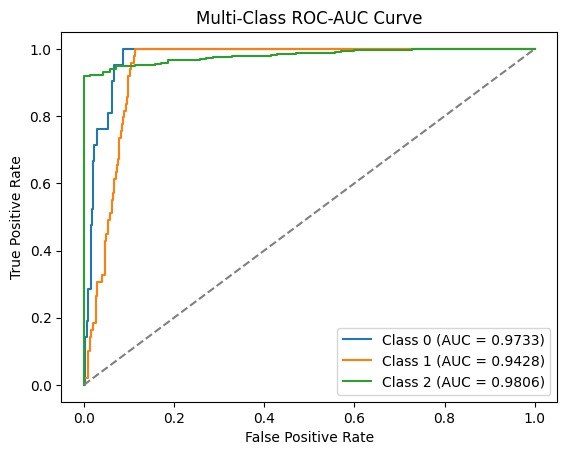


Confusion Matrix:
 [[ 12   9   0]
 [ 18  21  10]
 [  5  47 994]]


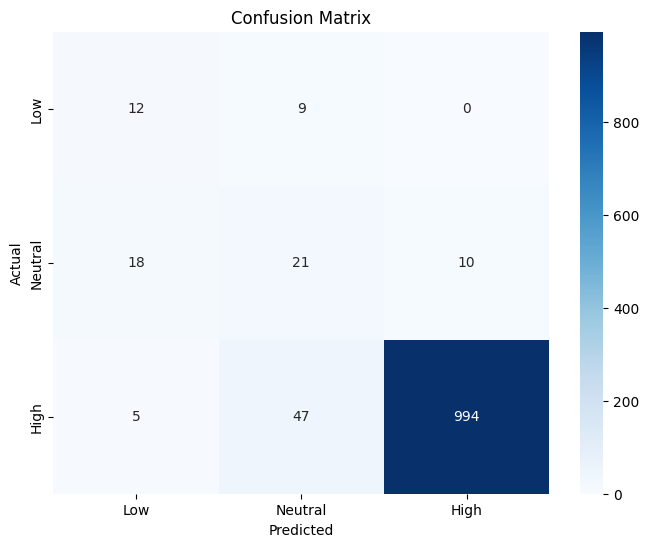

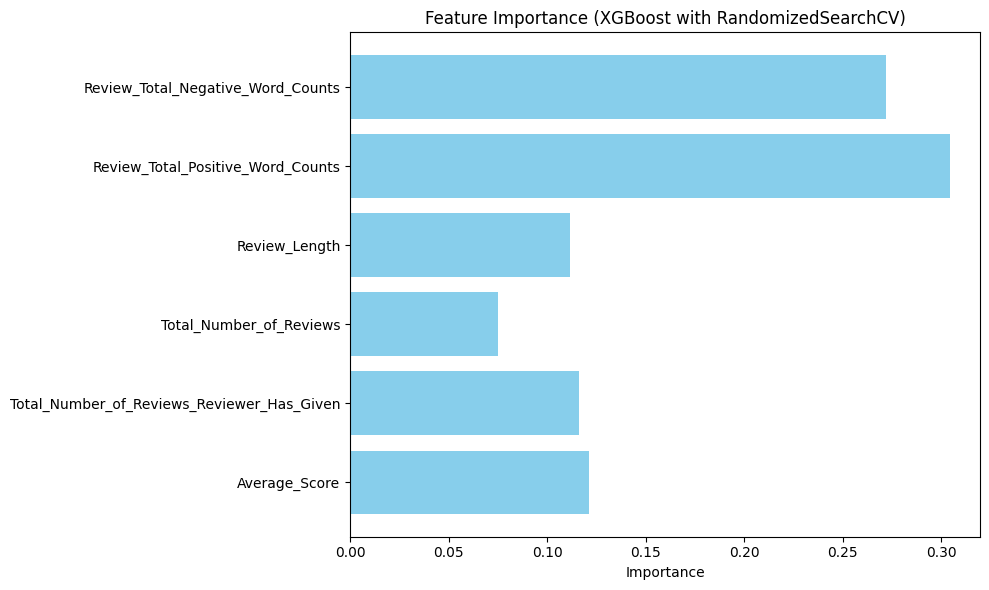

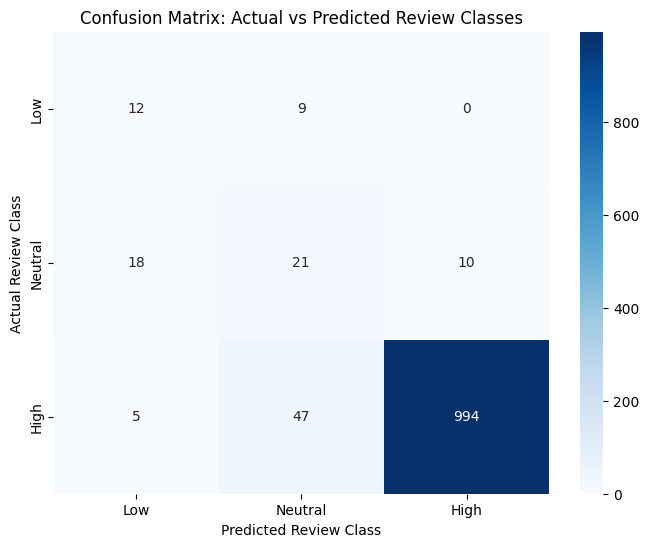

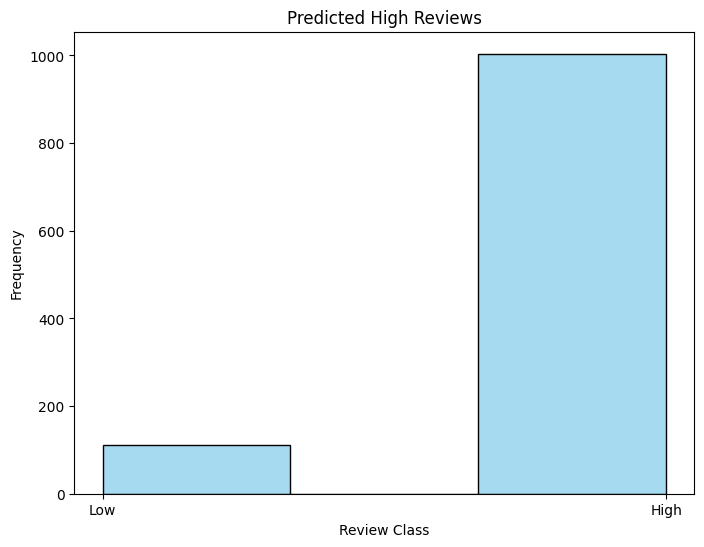

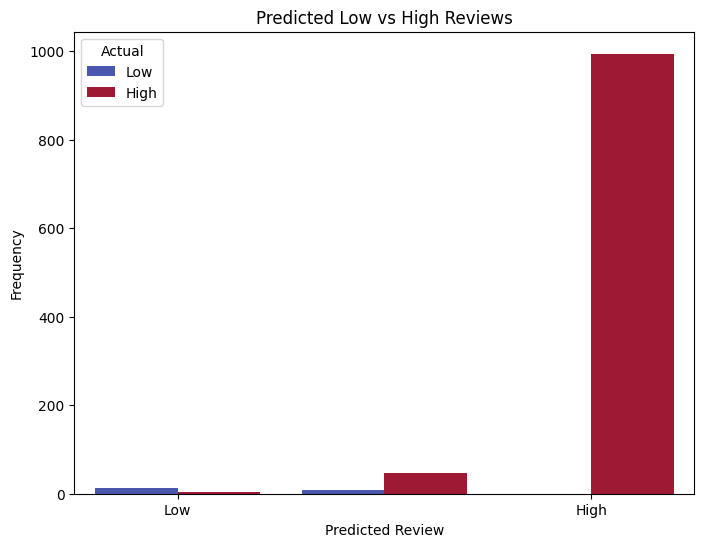

In [19]:
#4. How likely is a person to give a positive or negative review based on historical data?

import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import uniform

df = pd.read_csv('hotel_reviews_featured.csv', low_memory=False)

# Handle missing values
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())

for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

df['Reviewer_Score_Bin_Label'] = df['Reviewer_Score_Bin_Label'].apply(lambda x: 'low' if x <= 3 else ('neutral' if x <= 5 else 'high'))

df['Reviewer_Score_Bin_Label'] = df['Reviewer_Score_Bin_Label'].map({'low': 0, 'neutral': 1, 'high': 2})

df_sampled = df.sample(frac=0.1, random_state=42)

#features and target variable
selected_features = [
    'Average_Score',
    'Total_Number_of_Reviews_Reviewer_Has_Given',
    'Total_Number_of_Reviews',
    'Review_Length',
    'Review_Total_Positive_Word_Counts',
    'Review_Total_Negative_Word_Counts'
]

X = df_sampled[selected_features]
y = df_sampled['Reviewer_Score_Bin_Label']

# 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#SMOTE Undersampling and Oversampling
smote = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=5)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

# Stratified K-Folds Cross-Validation
cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

param_dist = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [2, 3, 4],
    'colsample_bytree': [0.5, 0.7, 0.9],
    'subsample': [0.5, 0.7, 0.9],
    'alpha': [0.1, 0.3, 0.5],
    'lambda': [1.0, 1.5, 2.0]
}

model = xgb.XGBClassifier()

# hyperparameter tuning
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=10, cv=cv, verbose=1, random_state=42, n_jobs=-1)
random_search.fit(X_resampled, y_resampled)

best_model = random_search.best_estimator_

# Evaluation
y_pred = best_model.predict(X_test_scaled)
y_pred_proba = best_model.predict_proba(X_test_scaled)

classification_rep = classification_report(y_test, y_pred, output_dict=True)
print(classification_rep)

# Multi-Class ROC-AUC Score
roc_auc = roc_auc_score(pd.get_dummies(y_test), y_pred_proba, multi_class='ovr', average='macro')
print(f"ROC-AUC Score: {roc_auc:.4f}")

for i in range(3):
    fpr, tpr, _ = roc_curve(pd.get_dummies(y_test).iloc[:, i], y_pred_proba[:, i])
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc_score(pd.get_dummies(y_test).iloc[:, i], y_pred_proba[:, i]):.4f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC-AUC Curve')
plt.legend(loc='lower right')
plt.show()

# Confusion Matrix
final_confusion_mat = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", final_confusion_mat)

plt.figure(figsize=(8, 6))
sns.heatmap(final_confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Neutral', 'High'], yticklabels=['Low', 'Neutral', 'High'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Feature Importance
feature_importances = best_model.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(selected_features, feature_importances, color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance (XGBoost with RandomizedSearchCV)')
plt.tight_layout()
plt.show()

#Actual vs Predicted
confusion = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", xticklabels=['Low', 'Neutral', 'High'], yticklabels=['Low', 'Neutral', 'High'])
plt.title("Confusion Matrix: Actual vs Predicted Review Classes")
plt.xlabel("Predicted Review Class")
plt.ylabel("Actual Review Class")
plt.show()

# Predicted High Reviews Plot
high_reviews_pred = y_pred == 2
plt.figure(figsize=(8, 6))
sns.histplot(high_reviews_pred, kde=False, bins=3, color="skyblue")
plt.title("Predicted High Reviews")
plt.xlabel("Review Class")
plt.ylabel("Frequency")
plt.xticks([0, 1], ['Low', 'High'])
plt.show()

# Predicted Low vs High Plot
low_vs_high_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
low_vs_high_pred = low_vs_high_pred[low_vs_high_pred['Actual'].isin([0, 2])]

plt.figure(figsize=(8, 6))
sns.countplot(data=low_vs_high_pred, x='Predicted', hue='Actual', palette="coolwarm")
plt.title("Predicted Low vs High Reviews")
plt.xlabel("Predicted Review")
plt.ylabel("Frequency")
plt.xticks([0, 2], ['Low', 'High'])
plt.legend(title="Actual", labels=['Low', 'High'])
plt.show()


Rows with invalid 'Review_Date' values:
Empty DataFrame
Columns: [Hotel_Address, Additional_Number_of_Scoring, Review_Date, Average_Score, Hotel_Name, Reviewer_Nationality, Negative_Review, Review_Total_Negative_Word_Counts, Total_Number_of_Reviews, Positive_Review, Review_Total_Positive_Word_Counts, Total_Number_of_Reviews_Reviewer_Has_Given, Reviewer_Score, Tags, days_since_review, lat, lng, Positive_Review_Tokenized, Negative_Review_Tokenized, Positive_Review_Length, Negative_Review_Length, Review_Length, City, City_Barcelona, City_Milan, City_Paris, City_United, City_Vienna, Total_Review_Length, Review_Month, Review_Weekday, Is_Holiday_Season, Weighted_Score, Reviewer_Score_Bin, Weighted_Score_Bin, Reviewer_Bin_Start, Weighted_Bin_Start, Reviewer_Score_Bin_Label, Weighted_Score_Bin_Label, Tags_2 rooms, Tags_3 rooms, Tags_4 rooms, Tags_Accessible Queen Guest Room, Tags_Aldwych Double Twin Room, Tags_Ambassador Junior Suite, Tags_Andaz Double Room, Tags_Andaz Large King Room, Tags_A

<Figure size 1000x600 with 0 Axes>

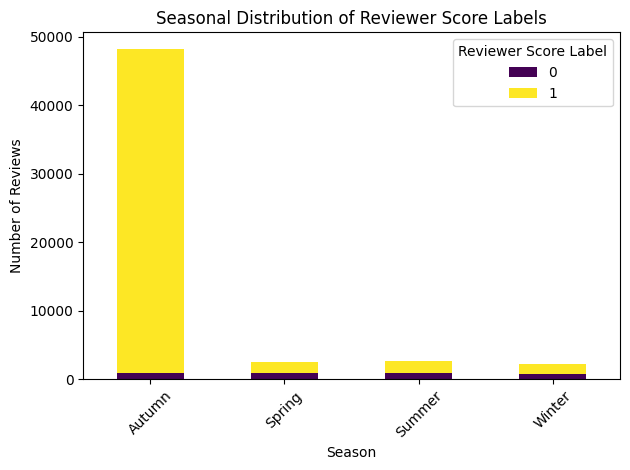

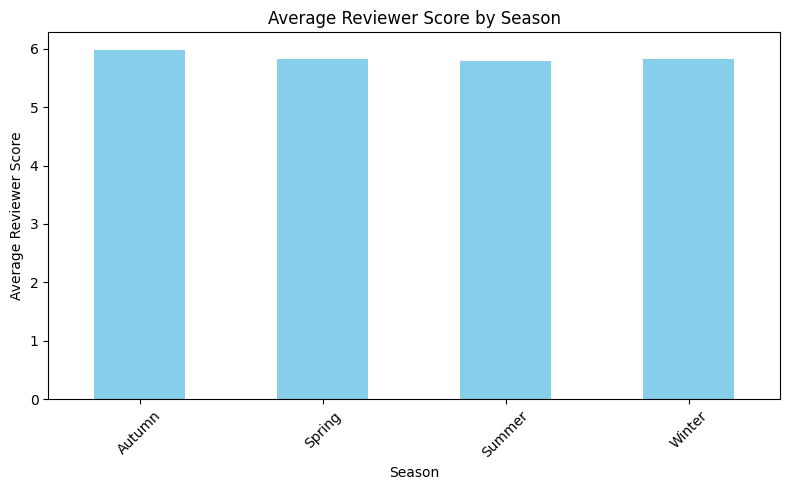


Best Parameters from GridSearchCV:
{'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.8}

Classification Report:
Class 0:
  precision: 0.316
  recall: 0.324
  f1-score: 0.320
  support: 37.000
Class 1:
  precision: 0.952
  recall: 0.950
  f1-score: 0.951
  support: 521.000
Class macro avg:
  precision: 0.634
  recall: 0.637
  f1-score: 0.636
  support: 558.000
Class weighted avg:
  precision: 0.910
  recall: 0.909
  f1-score: 0.909
  support: 558.000

Formatted Classification Report:
              precision    recall  f1-score  support
0              0.315789  0.324324  0.320000     37.0
1              0.951923  0.950096  0.951009    521.0
macro avg      0.633856  0.637210  0.635504    558.0
weighted avg   0.909742  0.908602  0.909168    558.0

Feature Importance:
       Feature  Importance
1        Month    0.440718
2  Day_of_Week    0.327704
0         Year    0.194991
3      Holiday    0.036588


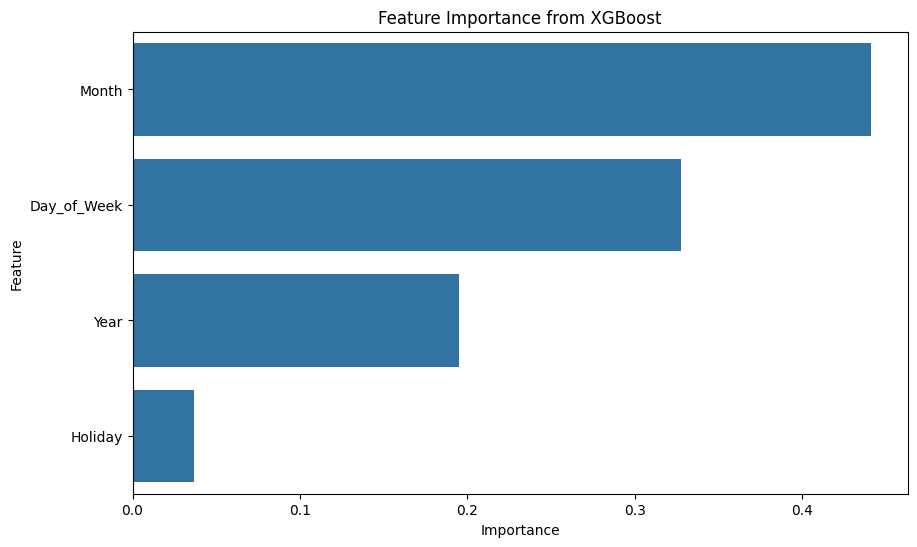

In [20]:
#5.How can we do analysis of reviewer score based on seasonal trends (temporal analysis)?
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
import xgboost as xgb
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import StratifiedKFold

df = pd.read_csv('hotel_reviews_featured.csv', low_memory=False)

# Fill missing values
numerical_cols = df.select_dtypes(include=['number']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Temporal Feature Engineering
df['Review_Date'] = pd.to_datetime(df['Review_Date'], errors='coerce')

print("\nRows with invalid 'Review_Date' values:")
print(df[df['Review_Date'].isna()])
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

df_temp = pd.DataFrame({
    'Year': df['Review_Date'].dt.year,
    'Month': df['Review_Date'].dt.month,
    'Season': df['Review_Date'].dt.month.apply(get_season),
    'Day_of_Week': df['Review_Date'].dt.weekday,
    'Holiday': df['Review_Date'].dt.month.isin([12])
})
df = pd.concat([df, df_temp], axis=1).copy()

df = df.dropna(subset=['Season', 'Reviewer_Score_Bin_Label'])

median_score = df['Reviewer_Score_Bin_Label'].median()
score_label_df = pd.DataFrame({'Reviewer_Score_Label': (df['Reviewer_Score_Bin_Label'] >= median_score).astype(int)})
df = pd.concat([df, score_label_df], axis=1)

df_sampled = df.sample(frac=0.05, random_state=42)

print("Unique Seasons:", df['Season'].unique())

score_season_distribution = df.groupby(['Season', 'Reviewer_Score_Label']).size().unstack().fillna(0)

# seasonal distribution of reviewer scores
plt.figure(figsize=(10, 6))
score_season_distribution.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Seasonal Distribution of Reviewer Score Labels')
plt.xlabel('Season')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.legend(title="Reviewer Score Label", loc='upper right')
plt.tight_layout()
plt.show()

# Calculate average reviewer score per season
average_score_by_season = df.groupby('Season')['Reviewer_Score_Bin_Label'].mean()

# Plot the average score by season
plt.figure(figsize=(8, 5))
average_score_by_season.plot(kind='bar', color='skyblue')
plt.title('Average Reviewer Score by Season')
plt.xlabel('Season')
plt.ylabel('Average Reviewer Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

X = df_sampled[['Year', 'Month', 'Day_of_Week', 'Holiday']]
y = df_sampled['Reviewer_Score_Label']

#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to oversample minority classes in the training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

class_weights = compute_class_weight('balanced', classes=y.unique(), y=y_train_smote)
class_weight_dict = dict(zip(y.unique(), class_weights))

params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'random_state': 42,
    'learning_rate': 0.1,
    'max_depth': 3,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'gamma': 0.1,
    'alpha': 0.1,
    'scale_pos_weight': 10
}
model = xgb.XGBClassifier(**params)

param_grid = {
    'learning_rate': [0.1],
    'max_depth': [3],
    'subsample': [0.8],
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=2, scoring='f1_weighted', n_jobs=-1)
grid_search.fit(X_train_smote, y_train_smote, sample_weight=y_train_smote.map(class_weight_dict))

#the best parameters
print("\nBest Parameters from GridSearchCV:")
print(grid_search.best_params_)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

report = classification_report(y_test, y_pred, output_dict=True)
del report['accuracy']

print("\nClassification Report:")
for class_label, metrics in report.items():
    print(f"Class {class_label}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.3f}")

report_df = pd.DataFrame(report).transpose()
print("\nFormatted Classification Report:")
print(report_df)

feature_importances = best_model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance_df)

#Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from XGBoost')
plt.show()


Fitting 3 folds for each of 10 candidates, totalling 30 fits


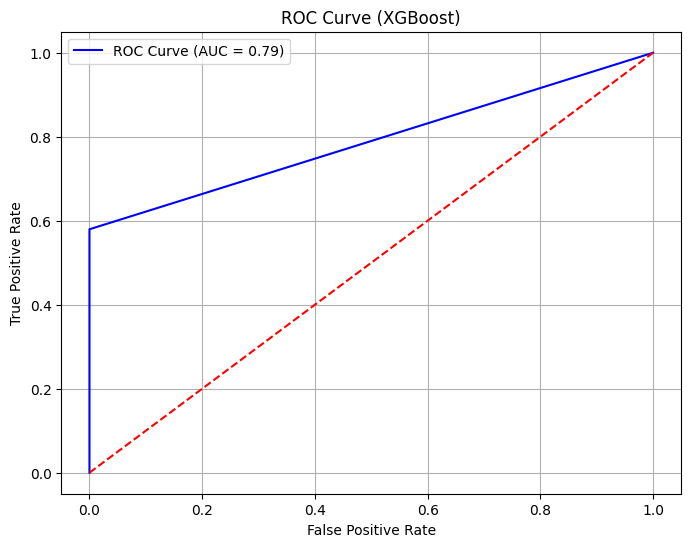


Classification Report after Threshold Moving (XGBoost):
{'0': {'precision': 0.14453125, 'recall': 1.0, 'f1-score': 0.2525597269624573, 'support': 37}, '1': {'precision': 1.0, 'recall': 0.5796545105566219, 'f1-score': 0.7339003645200486, 'support': 521}, 'macro avg': {'precision': 0.572265625, 'recall': 0.789827255278311, 'f1-score': 0.49323004574125295, 'support': 558}, 'weighted avg': {'precision': 0.9432753696236559, 'recall': 0.6075268817204301, 'f1-score': 0.7019835122088822, 'support': 558}}


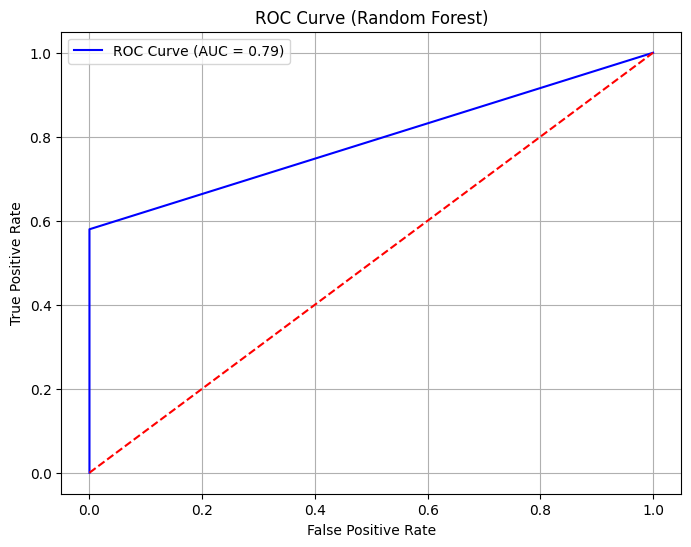


Classification Report for Random Forest after Threshold Moving:
{'0': {'precision': 0.14453125, 'recall': 1.0, 'f1-score': 0.2525597269624573, 'support': 37}, '1': {'precision': 1.0, 'recall': 0.5796545105566219, 'f1-score': 0.7339003645200486, 'support': 521}, 'macro avg': {'precision': 0.572265625, 'recall': 0.789827255278311, 'f1-score': 0.49323004574125295, 'support': 558}, 'weighted avg': {'precision': 0.9432753696236559, 'recall': 0.6075268817204301, 'f1-score': 0.7019835122088822, 'support': 558}}


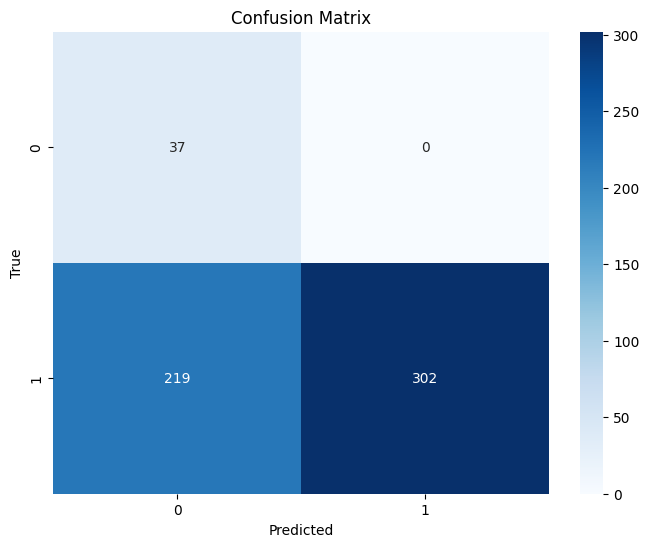

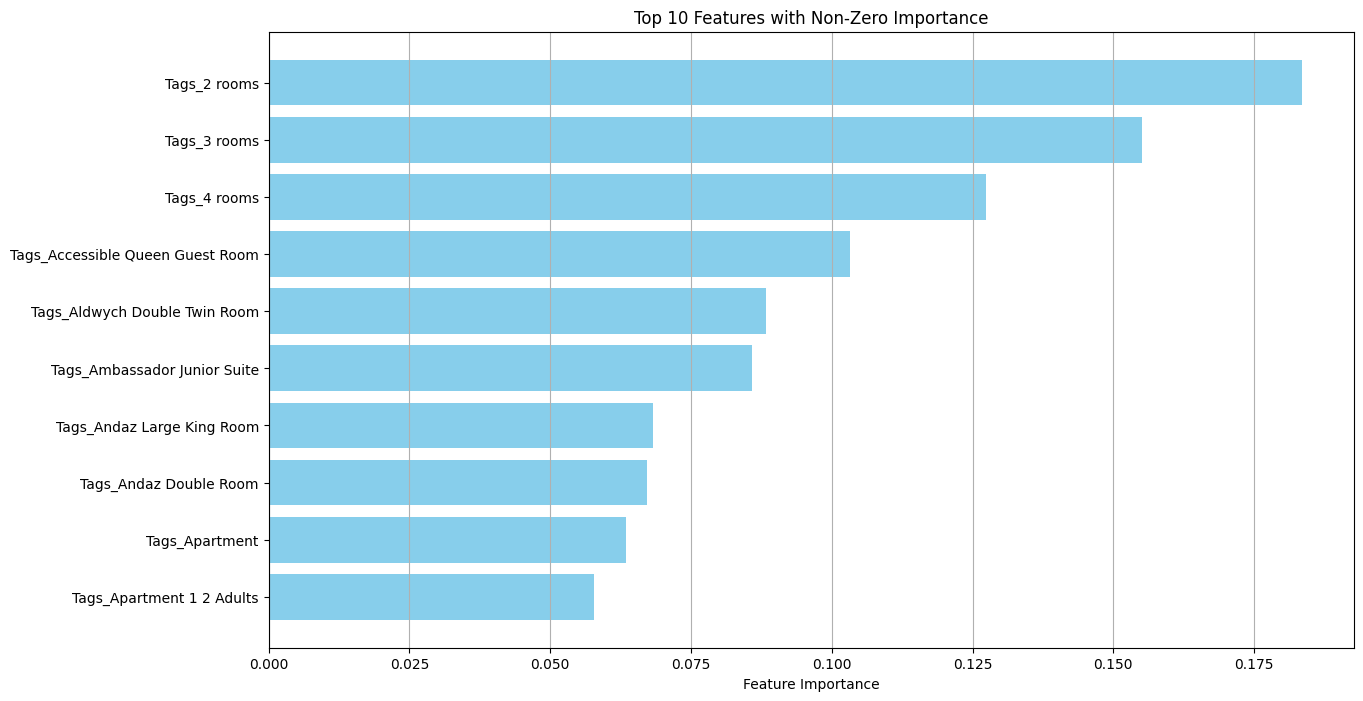

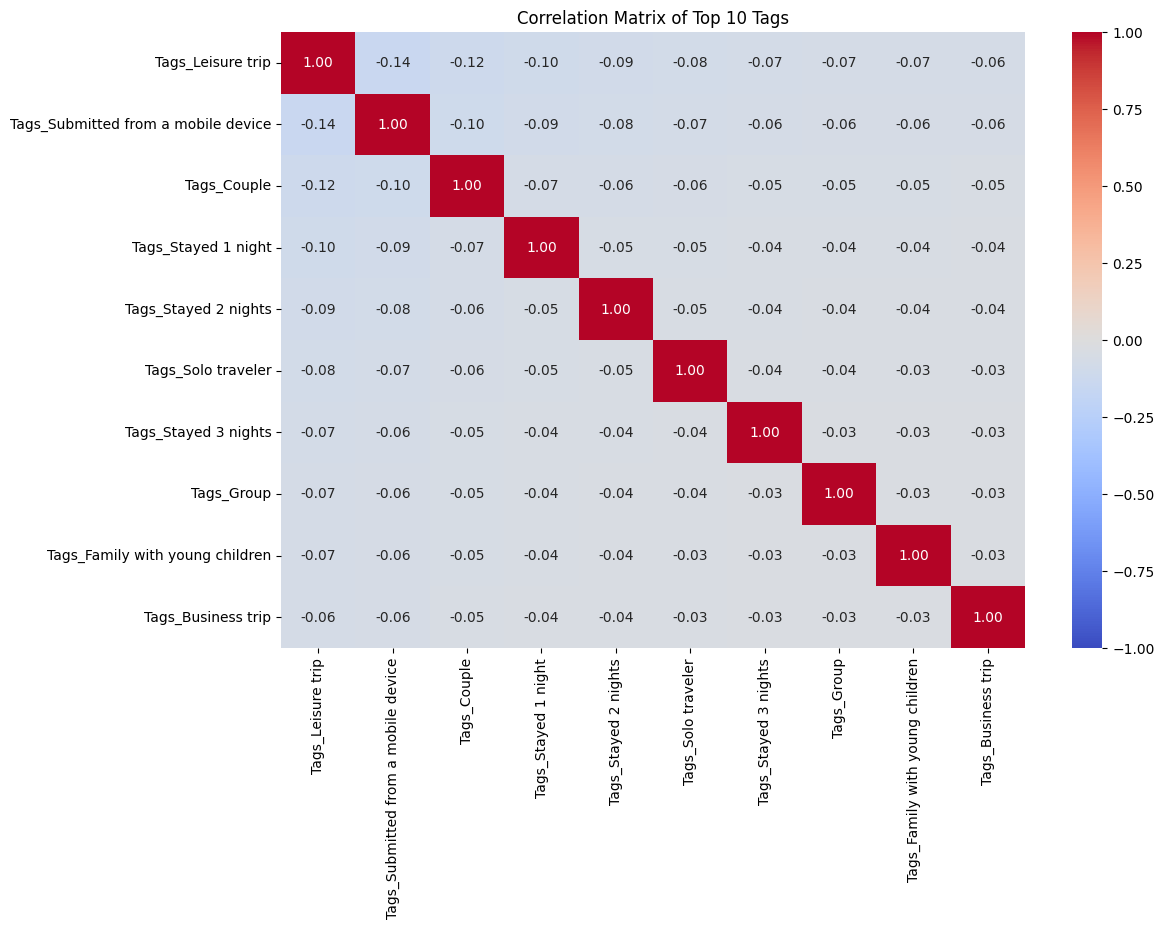

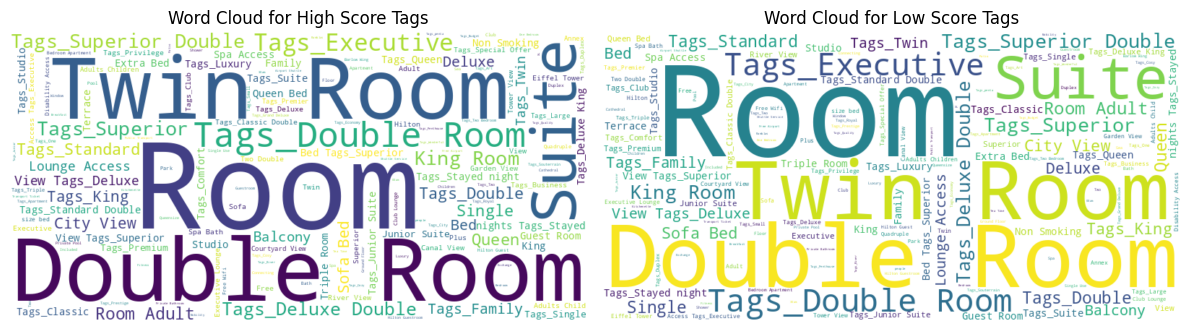

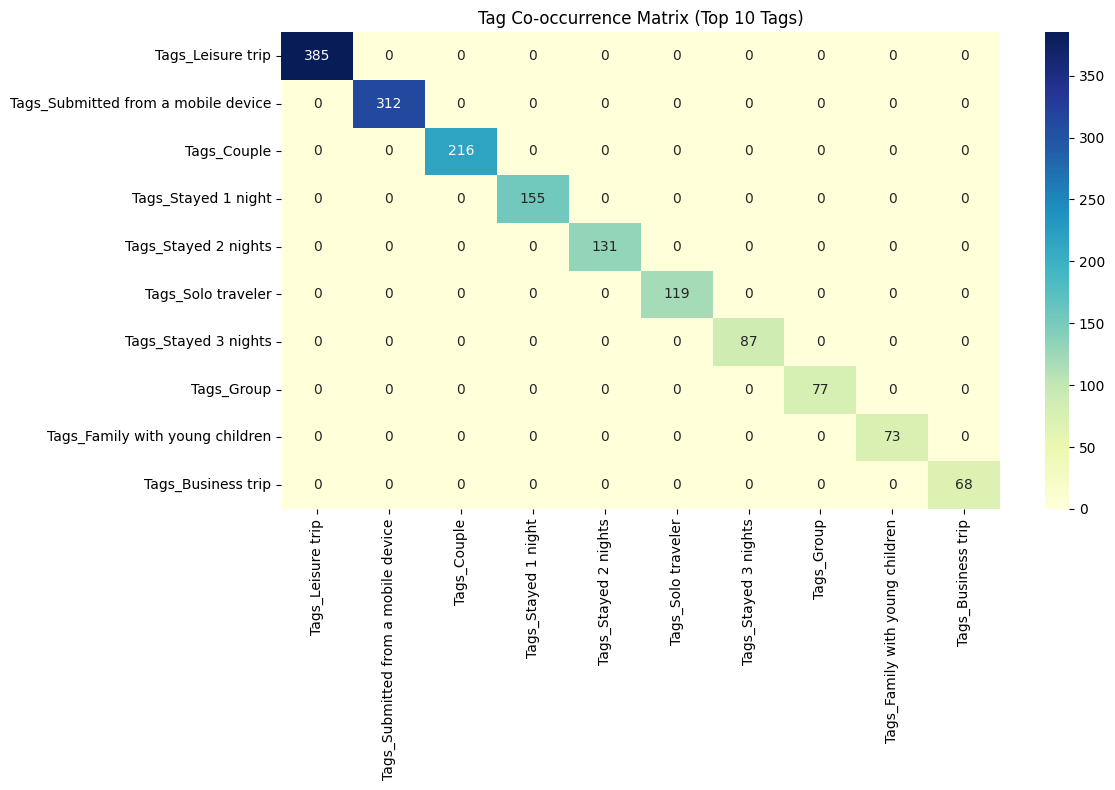

In [21]:
#6.Which attributes/common mentions in tags contribute to reviewer score?
!pip install wordcloud
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.exceptions import UndefinedMetricWarning
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import uniform
from sklearn.utils.class_weight import compute_class_weight
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=UndefinedMetricWarning)

df = pd.read_csv('hotel_reviews_featured.csv', low_memory=False)

# Handle missing values
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

tags_columns = [col for col in df.columns if col.startswith('Tags_')]

df_sampled = df.sample(frac=0.05, random_state=42)

median_score = df_sampled['Reviewer_Score_Bin_Label'].median()
score_label_df = pd.DataFrame({'Reviewer_Score_Label': (df_sampled['Reviewer_Score_Bin_Label'] >= median_score).astype(int)})
df_sampled = pd.concat([df_sampled, score_label_df], axis=1)

#features and target
tag_counts = df_sampled[tags_columns].sum().sort_values(ascending=False)
top_n_tags = tag_counts.head(10).index
X = df_sampled[top_n_tags]
y = df_sampled['Reviewer_Score_Label']

#train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#oversampling the minority class
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train_scaled, y_train)

# undersampling of the majority class
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train_oversampled, y_train_oversampled)

class_weights = compute_class_weight('balanced', classes=np.unique(y_train_resampled), y=y_train_resampled)
class_weight_dict = dict(zip(np.unique(y_train_resampled), class_weights))

param_dist = {
    'max_depth': [3, 5, 7],
    'learning_rate': uniform(0.01, 0.1),
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb_model = xgb.XGBClassifier(objective='binary:logistic',
                               scale_pos_weight=class_weight_dict[1],
                               random_state=42)

random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=10,
    cv=StratifiedKFold(n_splits=3),
    n_jobs=-1,
    verbose=1,
    scoring='roc_auc',
    random_state=42
)

random_search.fit(X_train_resampled, y_train_resampled)

#the best model
best_model = random_search.best_estimator_
y_pred_proba = best_model.predict_proba(X_test_scaled)[:, 1]

#ROC Curve and AUC
fpr, tpr, roc_thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

#ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (XGBoost)')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# threshold tuning
chosen_threshold_0 = 0.3
chosen_threshold_1 = 0.5

y_pred_thresholded = np.where(y_pred_proba >= chosen_threshold_1, 1, 0)
y_pred_thresholded = np.where(y_pred_proba < chosen_threshold_0, 0, y_pred_thresholded)

print("\nClassification Report after Threshold Moving (XGBoost):")
report = classification_report(y_test, y_pred_thresholded, zero_division=1, output_dict=True)
del report['accuracy']
print(report)

rf_model = RandomForestClassifier(random_state=42, class_weight='balanced', n_jobs=-1)
rf_model.fit(X_train_resampled, y_train_resampled)

y_pred_proba_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

fpr_rf, tpr_rf, roc_thresholds_rf = roc_curve(y_test, y_pred_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', label=f'ROC Curve (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Random Forest)')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# Set the threshold for Random Forest
chosen_threshold_rf = 0.4
y_pred_thresholded_rf = (y_pred_proba_rf >= chosen_threshold_rf).astype(int)

print("\nClassification Report for Random Forest after Threshold Moving:")
report_rf = classification_report(y_test, y_pred_thresholded_rf, zero_division=1, output_dict=True)
del report_rf['accuracy']
print(report_rf)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_thresholded)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Feature Importance
feature_importance = best_model.feature_importances_
non_zero_idx = np.where(feature_importance > 0)[0]
sorted_idx = np.argsort(feature_importance[non_zero_idx])[-10:]

#bars for importance features
plt.figure(figsize=(14, 8))
plt.barh(range(len(sorted_idx)), feature_importance[non_zero_idx][sorted_idx], color='skyblue')
plt.yticks(range(len(sorted_idx)), [tags_columns[i] for i in non_zero_idx[sorted_idx]])
plt.xlabel("Feature Importance")
plt.title("Top 10 Features with Non-Zero Importance")
plt.grid(True, axis='x')
plt.show()

# Correlation Matrix of Top 10 Tags
plt.figure(figsize=(12, 8))
tags_corr = X.corr()
sns.heatmap(tags_corr, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Top 10 Tags')
plt.show()

#the most common tags in high and low score reviews
high_score_tags = ' '.join(df_sampled[df_sampled['Reviewer_Score_Label'] == 1][tags_columns].columns)
low_score_tags = ' '.join(df_sampled[df_sampled['Reviewer_Score_Label'] == 0][tags_columns].columns)

#word clouds for high and low scores
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
wordcloud_high = WordCloud(width=800, height=400, background_color='white').generate(high_score_tags)
plt.imshow(wordcloud_high, interpolation='bilinear')
plt.title('Word Cloud for High Score Tags')
plt.axis('off')

plt.subplot(1, 2, 2)
wordcloud_low = WordCloud(width=800, height=400, background_color='white').generate(low_score_tags)
plt.imshow(wordcloud_low, interpolation='bilinear')
plt.title('Word Cloud for Low Score Tags')
plt.axis('off')

plt.tight_layout()
plt.show()
top_n = 10
top_tags = df_sampled[tags_columns].sum().sort_values(ascending=False).head(top_n).index
tag_binary_matrix = df_sampled[top_tags].apply(lambda x: (x > 0).astype(int))

co_occurrence_matrix = tag_binary_matrix.T.dot(tag_binary_matrix)

#the co-occurrence heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(co_occurrence_matrix, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Tag Co-occurrence Matrix (Top 10 Tags)')
plt.tight_layout()
plt.show()

